# Goals and Project Structure



# Setting up the Project



### Mount Drive

In [58]:
# mount to google drive
# from google.colab import drive
# drive.mount('/content/drive')

### Import Libraries

> * will be importing mor elibraries as they become relevant in the project

In [59]:
pip install --upgrade numba ydata-profiling visions

  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)


In [60]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
from ydata_profiling import ProfileReport

### Load Dataset

In [61]:
url = '/content/drive/MyDrive/Data_Science_Projects/Loan Default/Loan_default.csv'
df = pd.read_csv(url)
df_copy = df.copy()
# quick glance at the data and ensure it is loaded properly
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

# Inspecting the Data

### Shape

In [62]:
shape = df.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns.')

The dataset has 255347 rows and 18 columns.


### Data Types

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

## Missing Values

In [64]:
missing_vals = df.isna().sum()

if missing_vals.any():
  print('There are missing values in the dataset.')
else:
  print('There are no missing values in the dataset.')

missing_vals

There are no missing values in the dataset.


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## Duplicate Values

In [65]:
duplicate_vals = df.duplicated().sum()

if duplicate_vals > 0:
  print(f'There are {duplicate_vals} duplicate rows in the dataset.')
else:
  print('There are no duplicate rows in the dataset.')

There are no duplicate rows in the dataset.


## Numerical Data

In [66]:
df.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

Looking at our means we see on average:

> - Most customers are ~ 44 years old and make ~\$82,500 a year
> - The average loan amount per customer is \$127,578 for a term of ~17 months at an interest rate of approximately 13.5%
> - The average credit score of a customer is 574 with a 0.5 DTI ratio

## Categorical Data

In [67]:
df.describe(include='object')

LoanID   Education EmploymentType MaritalStatus HasMortgage  \
count       255347      255347         255347        255347      255347   
unique      255347           4              4             3           2   
top     ZTH91CGL0B  Bachelor's      Part-time       Married         Yes   
freq             1       64366          64161         85302      127677   

       HasDependents LoanPurpose HasCoSigner  
count         255347      255347      255347  
unique             2           5           2  
top              Yes    Business         Yes  
freq          127742       51298      127701

From looking at our categorical data we see that:

> - ~25% of customers have a Bachelor's degree, with this being the most common level of education achieved by the customer
> - ~25% of customers also work part time
> - ~50% of customers have a mortgage, a dependent, and/or a cosigner

## Detecting Outliers

* First we find the Interquartile Range (middle 50% of our data)
* Using the IQR we determine our upper and lower bounds
> - $\text{LowerBound} = \text{Q1} - 1.5 \times \text{IQR}$
> - $\text{UpperBound} = \text{Q3} + 1.5 \times \text{IQR}$
* Any value **below** the *lower bound* and **above** the *upper bound* is an outlier

In [68]:
# exclude the 'Default' column
# 'Default' column uses 1, 0 instead of yes, no
# not needed in outlier detection
df_no_default = df.drop('Default', axis=1)

def find_outliers(df):
  outlier_count = {}
  for col in df.select_dtypes(include='number'):
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      outlier_count[col] = outliers.shape[0]
  return outlier_count

outliers_iqr = find_outliers(df_no_default)
outliers_df = pd.DataFrame(list(outliers_iqr.items()), columns=['Column', 'Outlier Count'])
outliers_df

Column  Outlier Count
0             Age              0
1          Income              0
2      LoanAmount              0
3     CreditScore              0
4  MonthsEmployed              0
5  NumCreditLines              0
6    InterestRate              0
7        LoanTerm              0
8        DTIRatio              0

# Exploratory Data Analysis

In [69]:
eda = ProfileReport(df,  title = 'EDA REPORT ')
eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Some Observations:

> - Our data is not normally distributed, rather most if it is roughly uniform, which means we need to use non-parametric models
> - Our data also has low correlation, no one feature is affected by the other

## Normality Check

In [70]:
def plot_normality_check(data, feature, figsize=(12, 5)):
    """
    Create side-by-side plots to check normality of a numerical feature:
    1. Histogram with KDE and normal distribution overlay
    2. Q-Q plot

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataframe containing the feature
    feature : str
        The name of the feature to analyze
    figsize : tuple, optional
        Figure size for the plot (width, height)

    Returns:
    --------
    None: Displays the plots
    """

    # Create figure and axes for side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Get the data for the feature
    feature_data = data[feature].dropna()

    # Plot 1: Histogram with KDE
    sns.histplot(data=feature_data, stat='density', kde=True, ax=ax1)

    # Add normal distribution curve
    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = feature_data.mean(), feature_data.std()
    p = stats.norm.pdf(x, mu, std)
    ax1.plot(x, p, 'r--', linewidth=2, label='Normal Distribution')

    # Customize first plot
    ax1.set_title(f'Distribution of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Density')
    ax1.legend()

    # Plot 2: Q-Q plot
    stats.probplot(feature_data, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot of {feature}')

    # Add overall title and adjust layout
    plt.suptitle(f'Normality Check for {feature}', y=1.05)
    plt.tight_layout()

    # Show plot
    plt.show()

    # Print Shapiro-Wilk test results
    stat, p_value = stats.shapiro(feature_data.sample(min(5000, len(feature_data))))
    print(f'\nShapiro-Wilk Test Results for {feature}:')
    print(f'Statistic: {stat:.4f}')
    print(f'p-value: {p_value:.4f}')
    if p_value < 0.05:
        print('The feature is not normally distributed (rejects null hypothesis)')
    else:
        print('The feature appears to be normally distributed (fails to reject null hypothesis)')

    # Print skewness and kurtosis
    print(f'\nSkewness: {stats.skew(feature_data):.4f}')
    print(f'Kurtosis: {stats.kurtosis(feature_data):.4f}')

# Example usage for multiple features:
def check_all_numeric_features(data, exclude_cols=None):
    """
    Check normality for all numeric features in the dataset

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataframe to analyze
    exclude_cols : list, optional
        List of column names to exclude from analysis

    Returns:
    --------
    None: Displays plots for each numeric feature
    """

    # Get numeric columns
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Exclude specified columns
    if exclude_cols:
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    # Plot normality check for each numeric feature
    for feature in numeric_cols:
        plot_normality_check(data, feature)
        print('\n' + '='*50 + '\n')

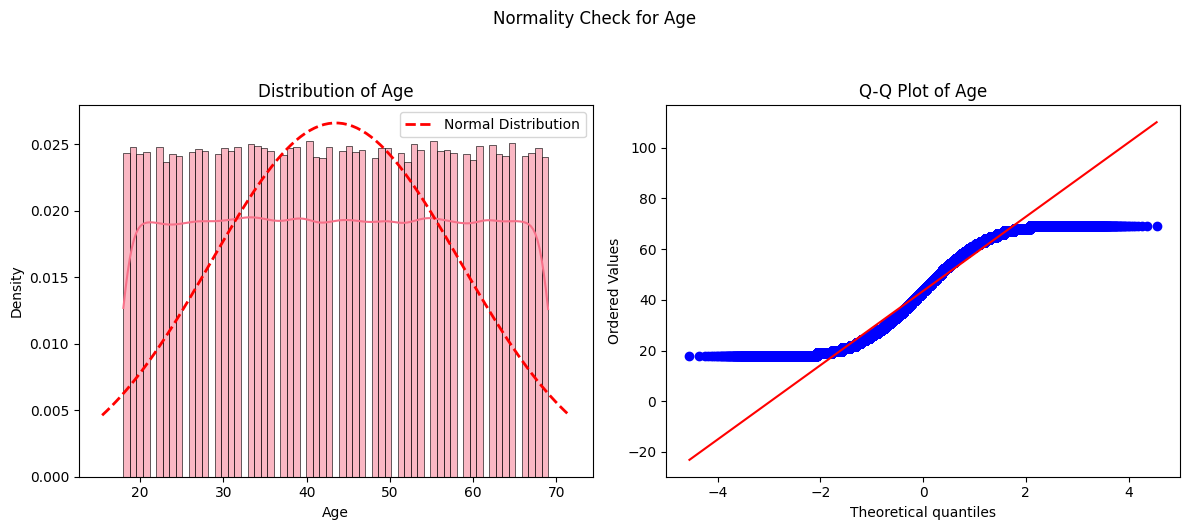


Shapiro-Wilk Test Results for Age:
Statistic: 0.9528
p-value: 0.0000
The feature is not normally distributed (rejects null hypothesis)

Skewness: 0.0007
Kurtosis: -1.1984




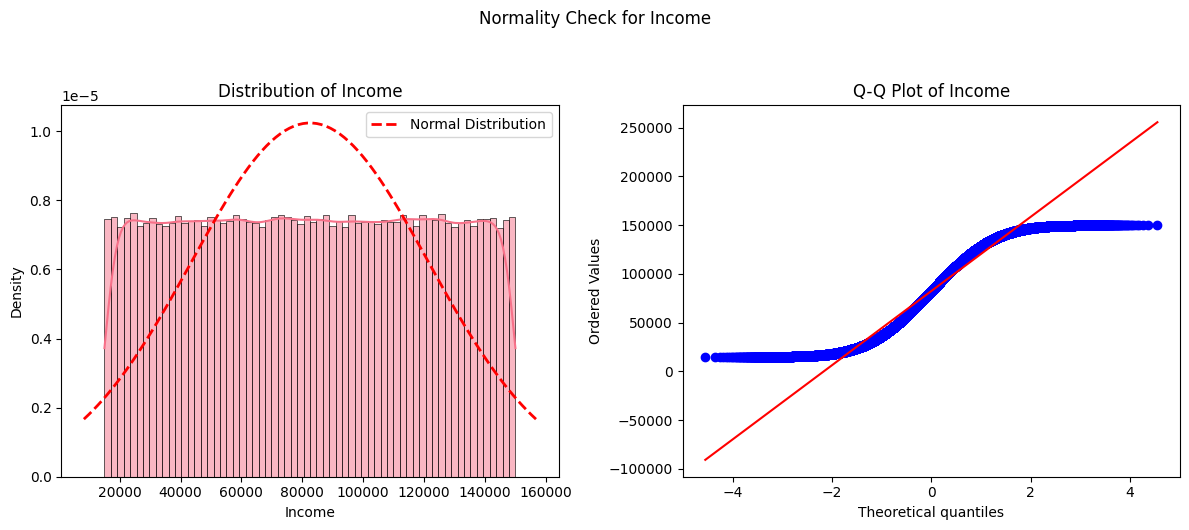


Shapiro-Wilk Test Results for Income:
Statistic: 0.9559
p-value: 0.0000
The feature is not normally distributed (rejects null hypothesis)

Skewness: -0.0004
Kurtosis: -1.1984




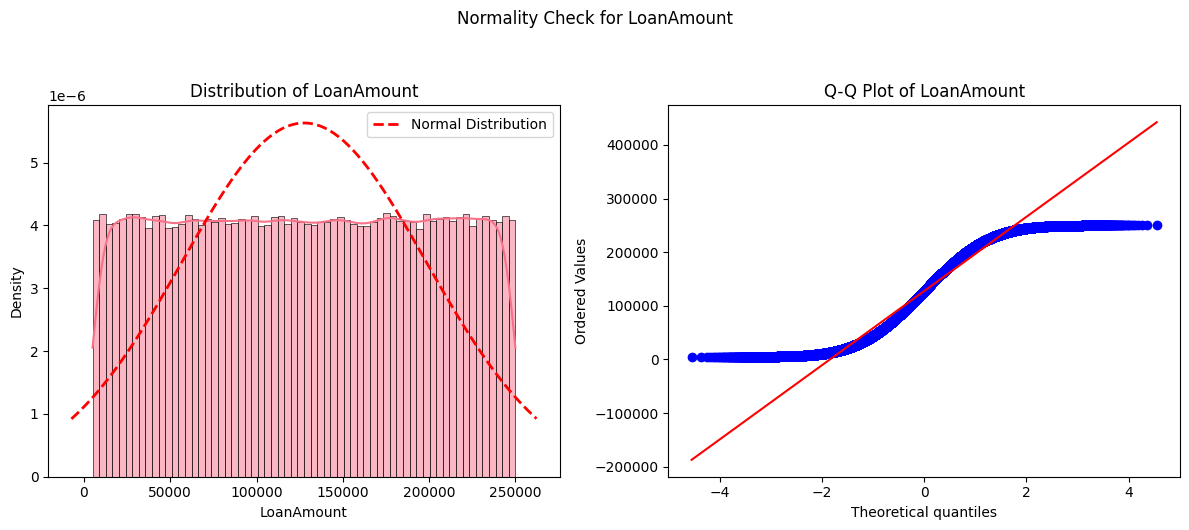


Shapiro-Wilk Test Results for LoanAmount:
Statistic: 0.9550
p-value: 0.0000
The feature is not normally distributed (rejects null hypothesis)

Skewness: -0.0018
Kurtosis: -1.2037




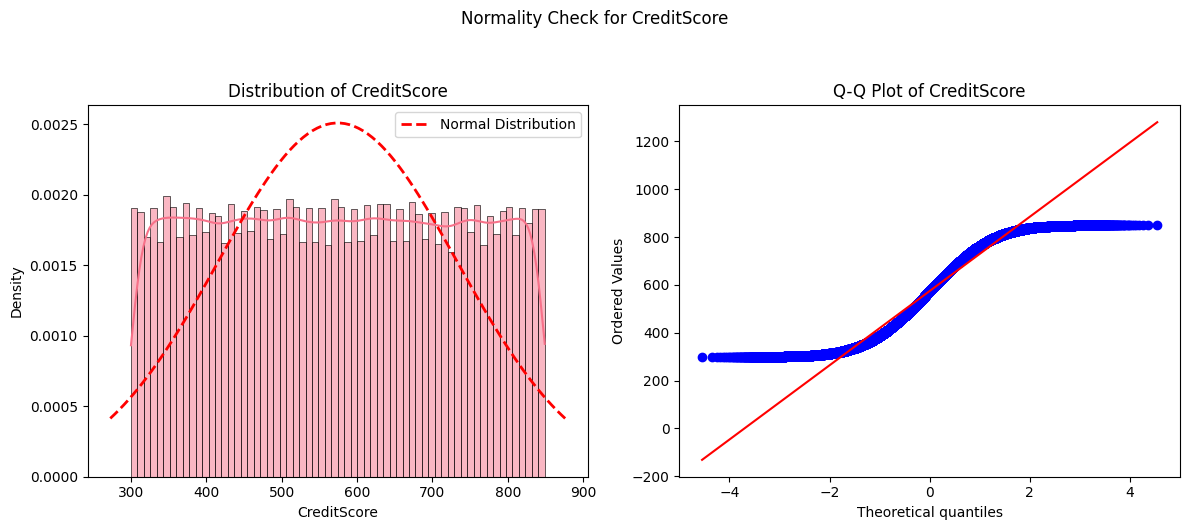


Shapiro-Wilk Test Results for CreditScore:
Statistic: 0.9526
p-value: 0.0000
The feature is not normally distributed (rejects null hypothesis)

Skewness: 0.0047
Kurtosis: -1.2003




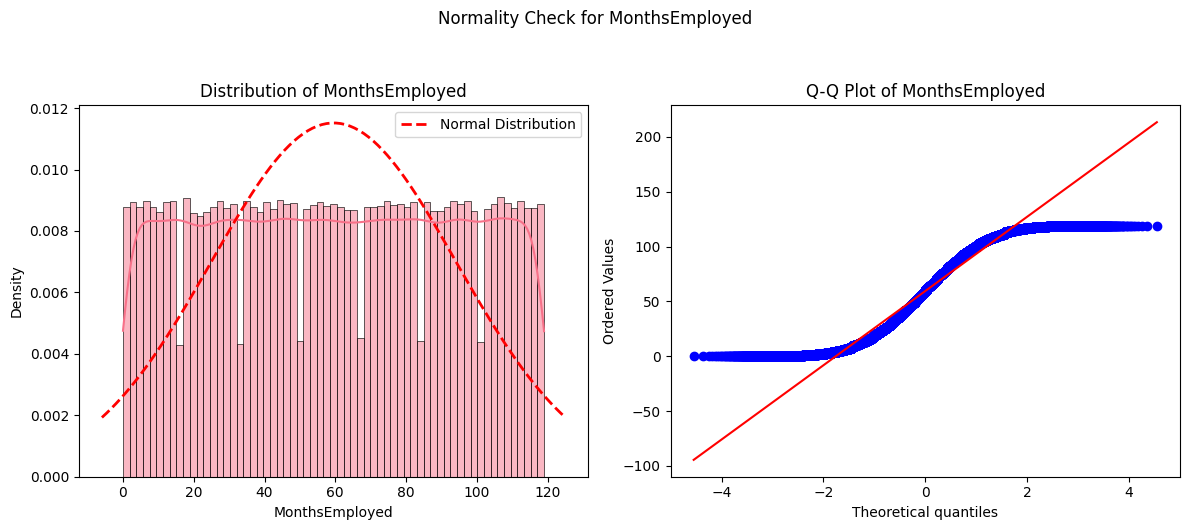


Shapiro-Wilk Test Results for MonthsEmployed:
Statistic: 0.9531
p-value: 0.0000
The feature is not normally distributed (rejects null hypothesis)

Skewness: -0.0021
Kurtosis: -1.1996




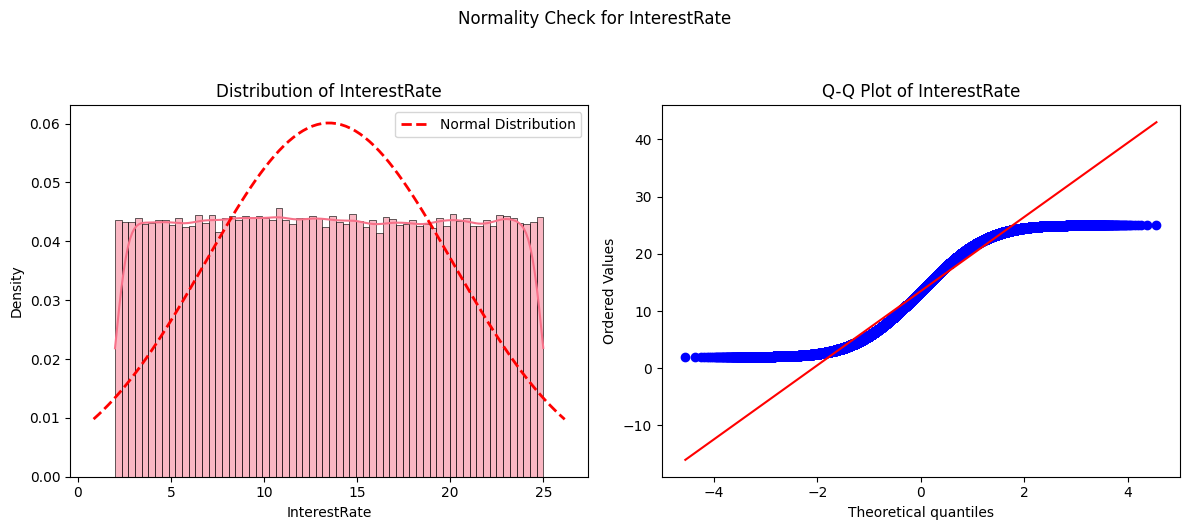


Shapiro-Wilk Test Results for InterestRate:
Statistic: 0.9566
p-value: 0.0000
The feature is not normally distributed (rejects null hypothesis)

Skewness: 0.0046
Kurtosis: -1.1972




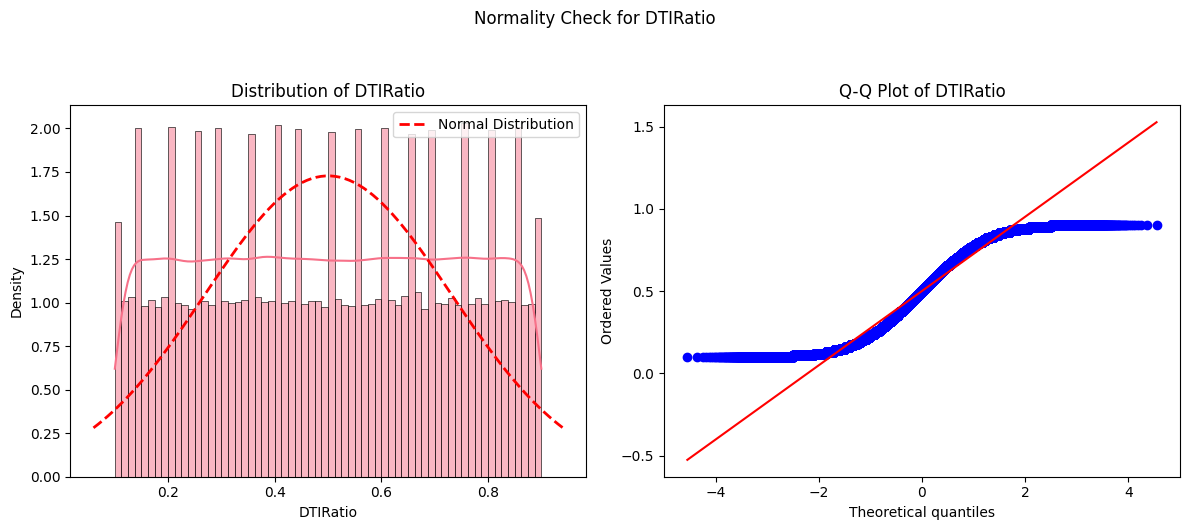


Shapiro-Wilk Test Results for DTIRatio:
Statistic: 0.9572
p-value: 0.0000
The feature is not normally distributed (rejects null hypothesis)

Skewness: -0.0015
Kurtosis: -1.1997




In [71]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

check_all_numeric_features(numeric_cols, exclude_cols=['LoanID', 'Default', 'NumCreditLines', 'LoanTerm'])

We can see here that the p-value for each column is zero, right away this tells us that our data is not normal in any numerical column. Similarly looking at the graphs, we see our histogram data does not match the bell-curve of normalised data, and similarly our data does not sit neatly on the trend lines in our Q-Q plot, all signs that we are not working with normalised data.

From here we can apply transofrmations to our data to make it more optimized for models that rely on normal data. Since we do not need our data to be normal in the analysis phase, we can simply continue with the data in it's current state, and later when choosing a model to train we can use one that does not rely on normalised data.

## Analyzing Risk

In [72]:
# Create new features
df['LoanToIncomeRatio'] = df['LoanAmount'] / df['Income']
df['RiskScore'] = (df['DTIRatio'] / df['CreditScore']) * 1000
df['MonthlyLoanBurden'] = (df['LoanAmount'] * (df['InterestRate']/1200)) / (1 - (1 + df['InterestRate']/1200)**(-df['LoanTerm']))
df['PaymentToIncome_Ratio'] = (df['MonthlyLoanBurden'] * 100) / (df['Income'] / 12)

### Risk Score and Loan-ToIncome Ratio


DTI Ratio Ranges:
--------------------------------------------------
Band 1: 9.9% to 26.0%
Band 2: 26.0% to 42.0%
Band 3: 42.0% to 58.0%
Band 4: 58.0% to 74.0%
Band 5: 74.0% to 90.0%

Loan-to-Income Ratio Ranges:
--------------------------------------------------
Band 1: 0.03x to 0.65x annual income
Band 2: 0.65x to 1.25x annual income
Band 3: 1.25x to 1.86x annual income
Band 4: 1.86x to 3.13x annual income
Band 5: 3.13x to 16.53x annual income


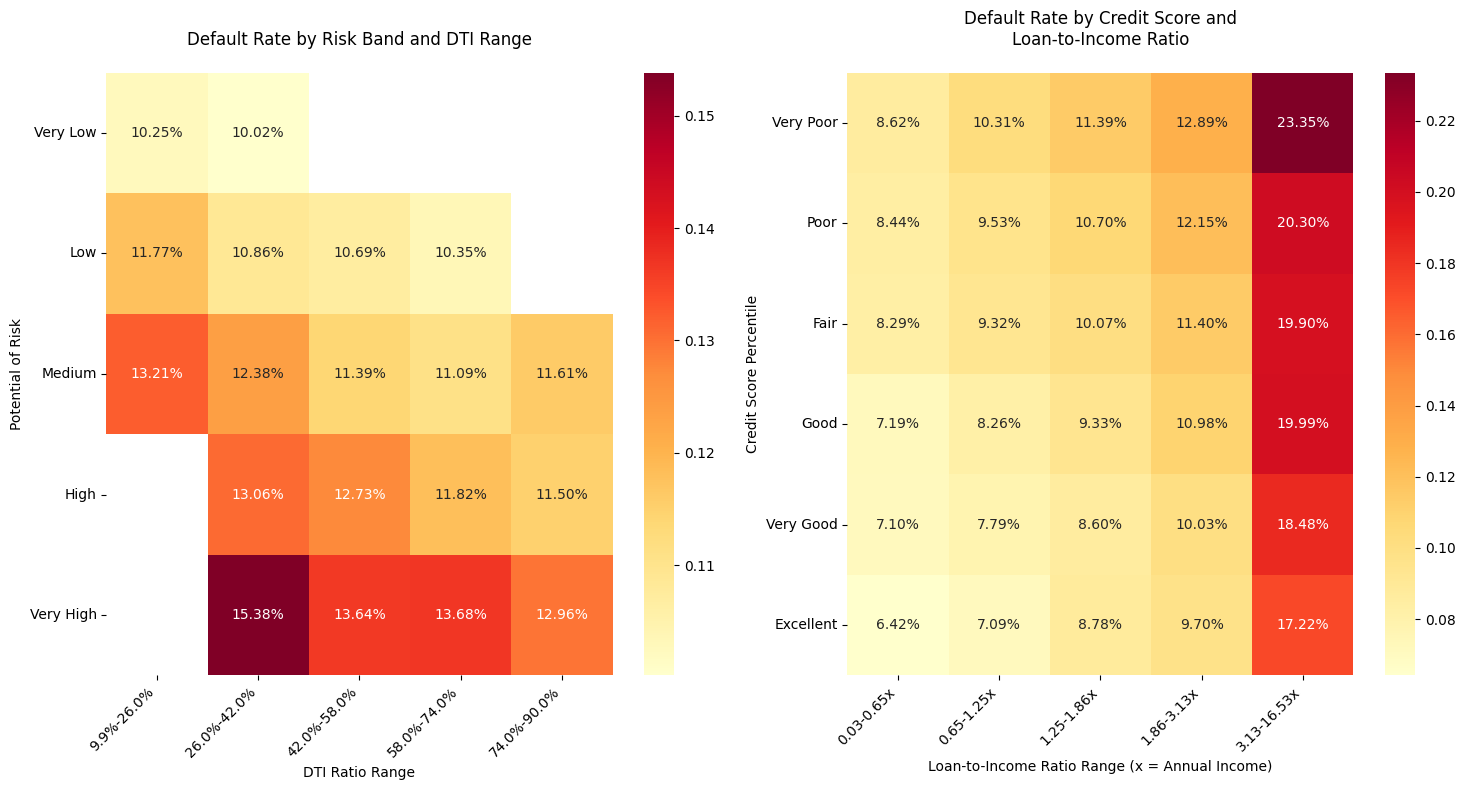


Risk Band Statistics:
--------------------------------------------------

Total number of loans: 255347

Breakdown by Risk Band:
           count  default_rate  num_defaults  percent_of_total
RiskBand                                                      
Very Low   51075         10.21          5213              20.0
Low        51064         10.98          5607              20.0
Medium     51072         11.56          5905              20.0
High       51069         12.02          6140              20.0
Very High  51067         13.29          6788              20.0

Columns:
- count: Number of loans in this risk band
- default_rate: Percentage of loans that defaulted in this band
- num_defaults: Number of defaults in this band
- percent_of_total: Percentage of total loans in this band


In [73]:
# Create bands for plot
df['RiskBand'] = pd.qcut(df['RiskScore'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['CreditScoreBand'] = pd.cut(df['CreditScore'],
                              bins=[300, 400, 500, 600, 700, 800, 850],
                              labels=['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

# Create DTI and LTI bins
dti_bins = pd.qcut(df['DTIRatio'], q=5)
df['LoanToIncomeRatio'] = df['LoanAmount'] / df['Income']
lti_bins = pd.qcut(df['LoanToIncomeRatio'], q=5)

print("\nDTI Ratio Ranges:")
print("-" * 50)
dti_ranges = [f"{interval.left:.1%}-{interval.right:.1%}"
             for interval in dti_bins.unique().categories]
for i, interval in enumerate(dti_bins.unique().categories, 1):
    print(f"Band {i}: {interval.left:.1%} to {interval.right:.1%}")

print("\nLoan-to-Income Ratio Ranges:")
print("-" * 50)
lti_ranges = [f"{interval.left:.2f}-{interval.right:.2f}x"
             for interval in lti_bins.unique().categories]
for i, interval in enumerate(lti_bins.unique().categories, 1):
    print(f"Band {i}: {interval.left:.2f}x to {interval.right:.2f}x annual income")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# 1. Default Rate by Risk Band and DTI
risk_dti_default = df.groupby(['RiskBand', dti_bins], observed=False)['Default'].mean().unstack()
risk_dti_default.columns = dti_ranges

sns.heatmap(risk_dti_default, annot=True, fmt='.2%', cmap='YlOrRd', ax=ax1)
ax1.set_title('Default Rate by Risk Band and DTI Range', pad=20)
ax1.set_xlabel('DTI Ratio Range')
ax1.set_ylabel('Potential of Risk')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# 2. Loan-to-Income Ratio vs Default Rate by Credit Score Band
lti_default = df.groupby(['CreditScoreBand', lti_bins], observed=False)['Default'].mean().unstack()
lti_default.columns = lti_ranges

sns.heatmap(lti_default, annot=True, fmt='.2%', cmap='YlOrRd', ax=ax2)
ax2.set_title('Default Rate by Credit Score and\nLoan-to-Income Ratio', pad=20)
ax2.set_xlabel('Loan-to-Income Ratio Range (x = Annual Income)')
ax2.set_ylabel('Credit Score Percentile')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Calculate Risk Band Statistics
risk_band_stats = df.groupby('RiskBand', observed=False)['Default'].agg([
    ('count', 'count'),
    ('default_rate', 'mean'),
    ('num_defaults', lambda x: x.sum())
]).round(4)

# Convert default rate to percentage
risk_band_stats['default_rate'] = (risk_band_stats['default_rate'] * 100).round(2)

# Add percentage of total loans column
risk_band_stats['percent_of_total'] = (risk_band_stats['count'] / risk_band_stats['count'].sum() * 100).round(2)

# Print Risk Band Statistics
print("\nRisk Band Statistics:")
print("-" * 50)
print(f"\nTotal number of loans: {df.shape[0]}")
print("\nBreakdown by Risk Band:")
print(risk_band_stats)
print("\nColumns:")
print("- count: Number of loans in this risk band")
print("- default_rate: Percentage of loans that defaulted in this band")
print("- num_defaults: Number of defaults in this band")
print("- percent_of_total: Percentage of total loans in this band")

Here we calculate the Potential of Risk as follows:

$\text{Potenital} = \frac{DTI Ratio}{Credit Score} \times 1000$

We see that:

* Just like we predicted, customers with a higher risk score are way more likely to default
* Although customers with a high DTI ratio  (58% +) are usually more likely to default, the customers within the range of (26%-42%) show the highest default rates across all risk potentials
* This tells us that using DTI ratio to predict which customers will default may not be as predictable as other factors, like credit score and Loan-To-Income Ratio that show clear trends
> * (Higher credit score and lower LTI ratio has less chance of defaulting and vice versa)


Default Rate Statistics:
--------------------------------------------------

DTI Ratio Quartiles and Default Rates:
                   mean  count
DTIRatio                      
(0.099, 0.3]  10.659331  65248
(0.3, 0.5]    11.535095  63970
(0.5, 0.7]    11.987896  63781
(0.7, 0.9]    12.306730  62348

Credit Score Quartiles and Default Rates:
                       mean  count
CreditScore                       
(299.999, 437.0]  13.055815  64140
(437.0, 574.0]    11.894425  63803
(574.0, 712.0]    11.290222  63896
(712.0, 849.0]    10.197141  63508


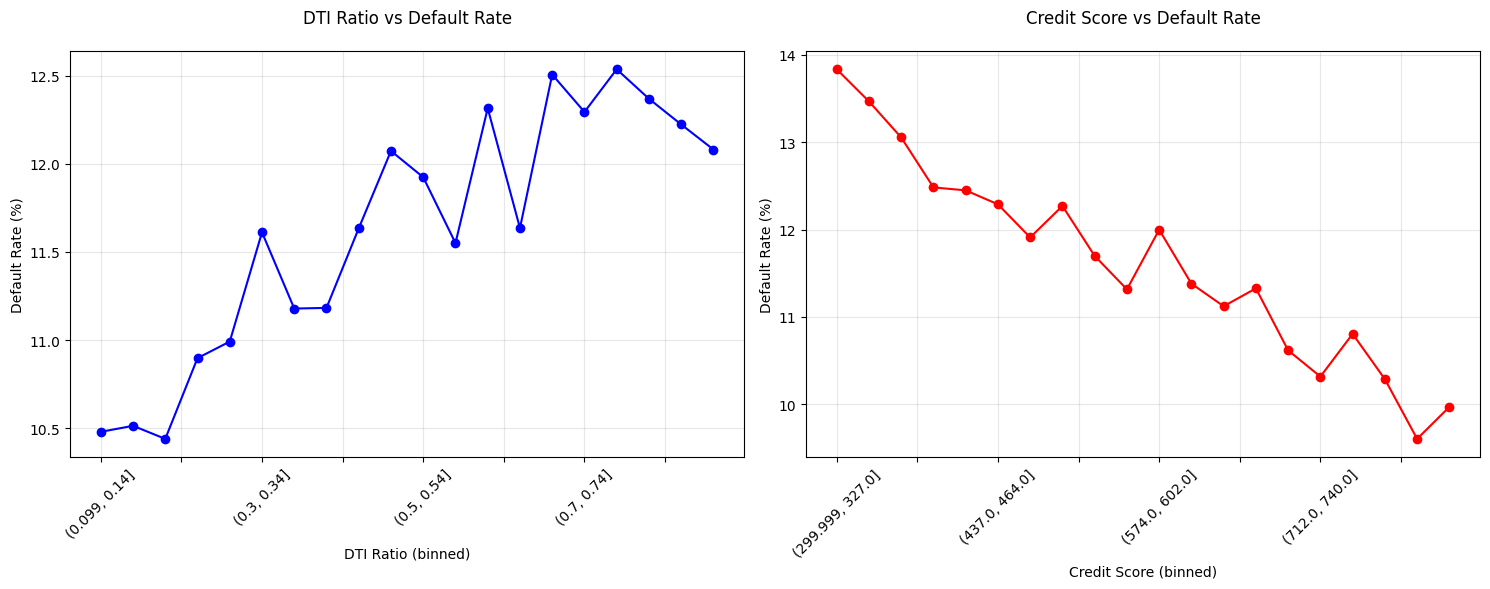

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: DTI Ratio vs Default Rate
# Create 20 bins of DTI Ratio and calculate mean default rate for each bin
dti_bins = pd.qcut(df['DTIRatio'], q=20)
default_by_dti = df.groupby(dti_bins, observed=False)['Default'].mean() * 100  # Convert to percentage

# Plot the DTI ratio vs default rate
default_by_dti.plot(kind='line', marker='o', color='blue', ax=ax1)
ax1.set_title('DTI Ratio vs Default Rate', pad=20)
ax1.set_xlabel('DTI Ratio (binned)')
ax1.set_ylabel('Default Rate (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Plot 2: Credit Score vs Default Rate
# Create 20 bins of Credit Score and calculate mean default rate for each bin
score_bins = pd.qcut(df['CreditScore'], q=20)
default_by_score = df.groupby(score_bins, observed=False)['Default'].mean() * 100  # Convert to percentage

# Plot the Credit Score vs default rate
default_by_score.plot(kind='line', marker='o', color='red', ax=ax2)
ax2.set_title('Credit Score vs Default Rate', pad=20)
ax2.set_xlabel('Credit Score (binned)')
ax2.set_ylabel('Default Rate (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Print some summary statistics
print("\nDefault Rate Statistics:")
print("-" * 50)
print("\nDTI Ratio Quartiles and Default Rates:")
dti_quartiles = pd.qcut(df['DTIRatio'], q=4)
dti_default_rates = df.groupby(dti_quartiles, observed=False)['Default'].agg(['mean', 'count'])
dti_default_rates['mean'] = dti_default_rates['mean'] * 100
print(dti_default_rates)

print("\nCredit Score Quartiles and Default Rates:")
score_quartiles = pd.qcut(df['CreditScore'], q=4)
score_default_rates = df.groupby(score_quartiles, observed=False)['Default'].agg(['mean', 'count'])
score_default_rates['mean'] = score_default_rates['mean'] * 100
print(score_default_rates)

Plotting risk factors(DTI Ratio and Credit Score) by Default Rate we see clear trends indicating that a Higer DTI ratio and A lower credit score increases a customers chance of defaulting on their loan.

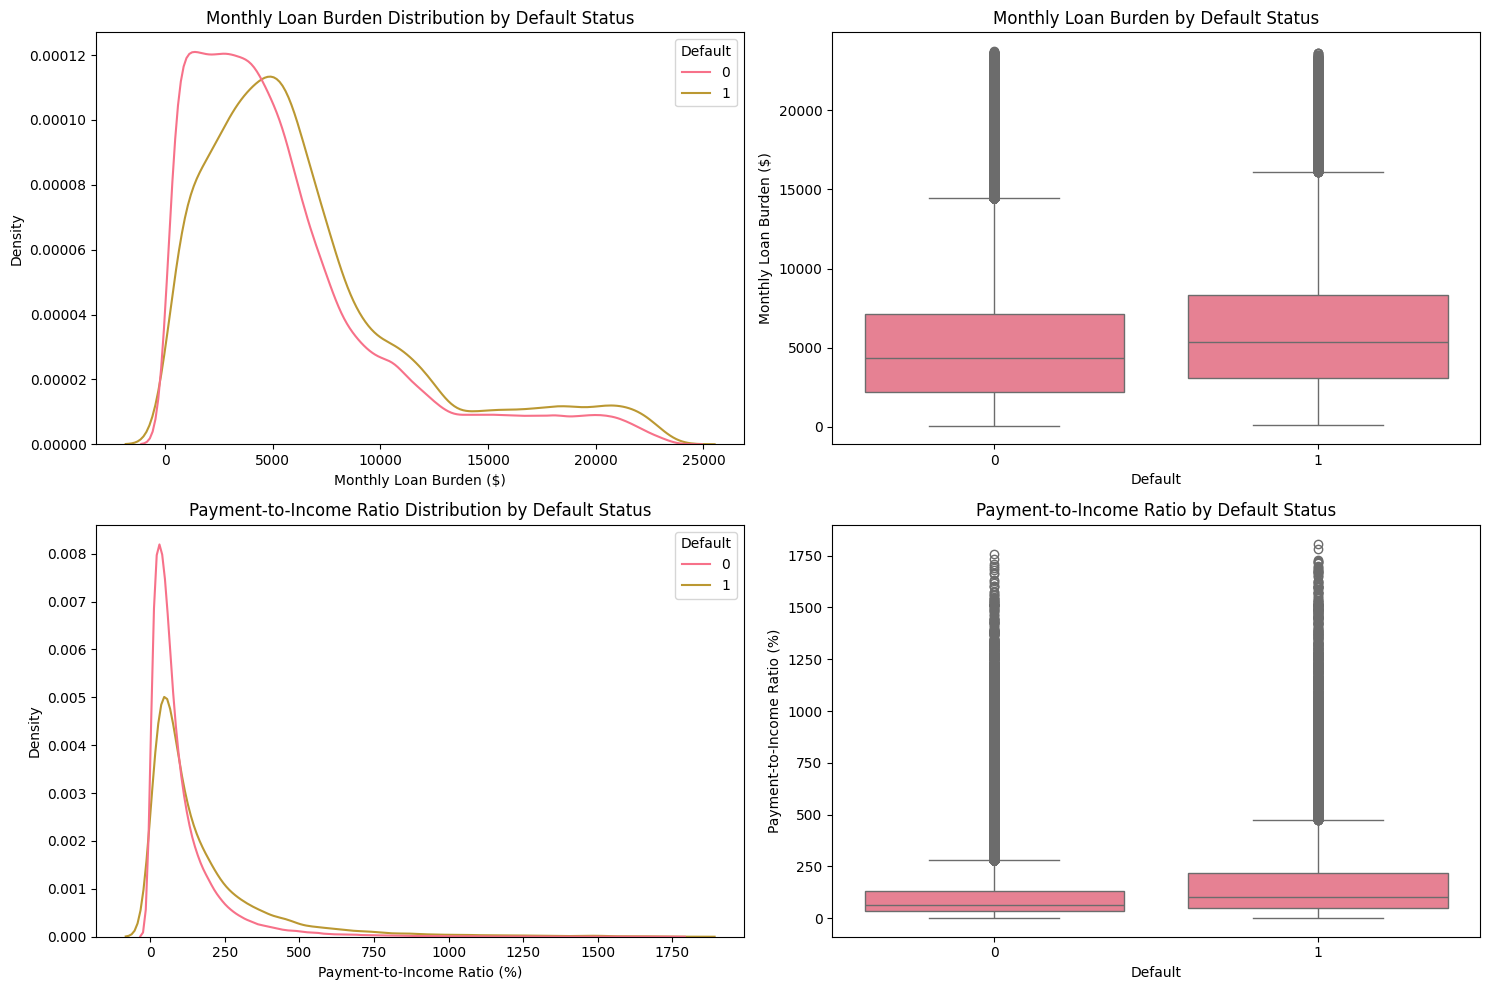

<ipython-input-75-60e55da54c11>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('Payment_RiskBand')['Default'].mean() * 100
<ipython-input-75-60e55da54c11>:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('PTI_RiskBand')['Default'].mean() * 100


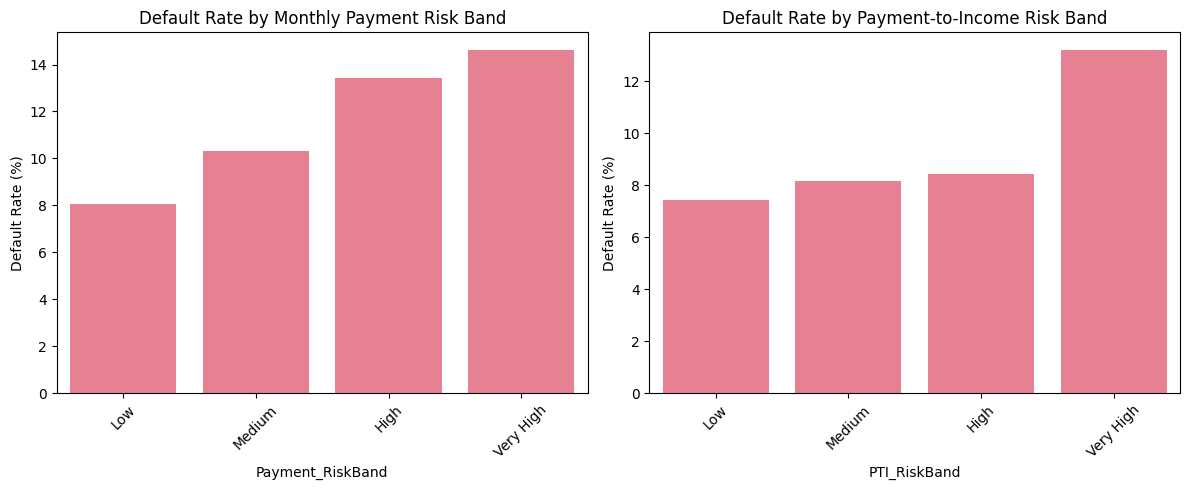

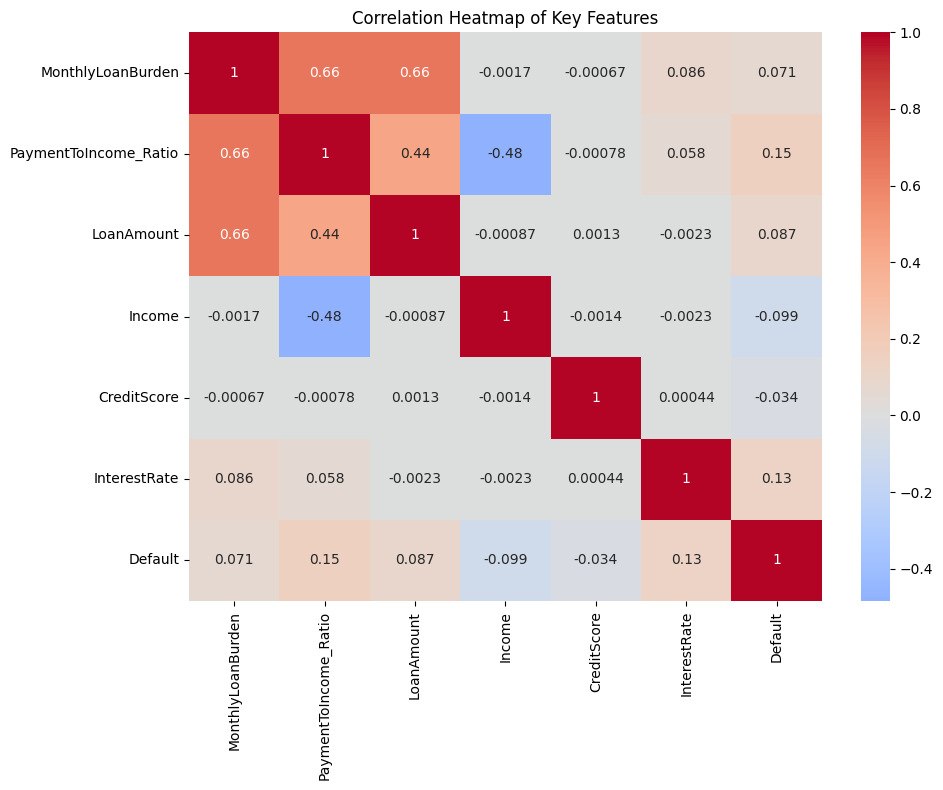


Monthly Loan Burden Statistics:
--------------------------------------------------
count    255347.00
mean       5649.06
std        4731.40
min          90.80
25%        2317.46
50%        4442.06
75%        7259.85
max       23735.67
Name: MonthlyLoanBurden, dtype: float64

Payment-to-Income Ratio Statistics:
--------------------------------------------------
count    255347.00
mean        115.73
std         146.64
min           0.82
25%          33.61
50%          68.25
75%         139.79
max        1808.61
Name: PaymentToIncome_Ratio, dtype: float64

Default Rates by Payment Risk Band:
--------------------------------------------------
                  count    mean
Payment_RiskBand               
Low               63837  0.0806
Medium            63837  0.1032
High              63836  0.1343
Very High         63837  0.1464

Default Rates by Payment-to-Income Risk Band:
--------------------------------------------------
               count    mean
PTI_RiskBand                
Low 

<ipython-input-75-60e55da54c11>:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Payment_RiskBand')['Default'].agg(['count', 'mean']).round(4))
<ipython-input-75-60e55da54c11>:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('PTI_RiskBand')['Default'].agg(['count', 'mean']).round(4))


In [75]:
# Set up the plotting style
sns.set_palette("husl")

# Create figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# 1. Monthly Loan Burden Analysis
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='MonthlyLoanBurden', hue='Default', common_norm=False)
plt.title('Monthly Loan Burden Distribution by Default Status')
plt.xlabel('Monthly Loan Burden ($)')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Default', y='MonthlyLoanBurden')
plt.title('Monthly Loan Burden by Default Status')
plt.ylabel('Monthly Loan Burden ($)')

# 2. Payment-to-Income Ratio Analysis
plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='PaymentToIncome_Ratio', hue='Default', common_norm=False)
plt.title('Payment-to-Income Ratio Distribution by Default Status')
plt.xlabel('Payment-to-Income Ratio (%)')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Default', y='PaymentToIncome_Ratio')
plt.title('Payment-to-Income Ratio by Default Status')
plt.ylabel('Payment-to-Income Ratio (%)')

plt.tight_layout()
plt.show()

# Create risk band analysis
plt.figure(figsize=(12, 5))

# Monthly Payment Risk Bands
payment_bins = df['MonthlyLoanBurden'].quantile([0, 0.25, 0.5, 0.75, 1.0])
df['Payment_RiskBand'] = pd.qcut(df['MonthlyLoanBurden'], q=4,
                                labels=['Low', 'Medium', 'High', 'Very High'])

plt.subplot(1, 2, 1)
default_rates = df.groupby('Payment_RiskBand')['Default'].mean() * 100
sns.barplot(x=default_rates.index, y=default_rates.values)
plt.title('Default Rate by Monthly Payment Risk Band')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)

# Payment-to-Income Risk Bands
pti_bins = [0, 20, 30, 40, float('inf')]
pti_labels = ['Low', 'Medium', 'High', 'Very High']
df['PTI_RiskBand'] = pd.cut(df['PaymentToIncome_Ratio'], bins=pti_bins, labels=pti_labels)

plt.subplot(1, 2, 2)
default_rates = df.groupby('PTI_RiskBand')['Default'].mean() * 100
sns.barplot(x=default_rates.index, y=default_rates.values)
plt.title('Default Rate by Payment-to-Income Risk Band')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create correlation heatmap
correlation_features = ['MonthlyLoanBurden', 'PaymentToIncome_Ratio',
                       'LoanAmount', 'Income', 'CreditScore', 'InterestRate', 'Default']
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMonthly Loan Burden Statistics:")
print("-" * 50)
print(df['MonthlyLoanBurden'].describe().round(2))

print("\nPayment-to-Income Ratio Statistics:")
print("-" * 50)
print(df['PaymentToIncome_Ratio'].describe().round(2))

# Print default rates by risk bands
print("\nDefault Rates by Payment Risk Band:")
print("-" * 50)
print(df.groupby('Payment_RiskBand')['Default'].agg(['count', 'mean']).round(4))

print("\nDefault Rates by Payment-to-Income Risk Band:")
print("-" * 50)
print(df.groupby('PTI_RiskBand')['Default'].agg(['count', 'mean']).round(4))

We calculate Monthly Loan Burden as follows:

$$\text{MonthlyLoanBurden} = \frac{\text{LoanAmount} \times (\frac{\text{InterestRate}}{1200})}{1 - (1 + \frac{\text{InterestRate}}{1200})^{-\text{LoanTerm}}}$$

> - Using the stadard amortization formula that ensures whether a loan is fully paid off by the end of its term or not based off of the  loan amount, interest rate (converted to monthly), and loan term
> - However looking at our kde plot, we can only gather that most customers have a monthly loan burden of ~$5000, but this is true for both defaulted customers and those who paid off thier loan

We calculate Payment to Income Ratio as:

$$\text{PaymentToIncome_Ratio} = \frac{\text{MonthlyLoanBurden} \times 100}{\frac{\text{Income}}{12}}$$

> - Here we express monthly loan payment as a percentage of monthly income
> - The higher the ratio is the more potential for risk
> - Again our kde plot dosent show much difference between defaulted customers and paid off customers

# ML Model Evaluation

* Here we will be testing the performance of various types of ML Models and choosing the best model for our data

## Pre Processing

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

def handle_missing_values(df):
    """Impute missing values appropriately"""
    data = df.copy()

    # Separate numerical and categorical columns
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns

    # Impute numerical columns with median
    numeric_imputer = SimpleImputer(strategy='median')
    data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

    # Impute categorical columns with mode
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

    if data.isnull().values.any():
        print("WARNING: There are still NaN values in the dataset after imputation!")
        print("Investigate and fix the source of these missing values.")
        print(data.isnull().sum()) # Print the columns with NaN values for debugging

    return data

    return data

def handle_outliers(df):
    """Handle outliers in numerical columns"""
    data = df.copy()

    # List of columns to check for outliers
    columns_to_check = ['Age', 'Income', 'LoanAmount', 'MonthsEmployed',
                       'NumCreditLines', 'InterestRate', 'DTIRatio',
                       'MonthlyLoanBurden', 'PaymentToIncome_Ratio',]

    for column in columns_to_check:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return data

def encode_categorical_variables(df):
    """Encode categorical variables appropriately"""

    data = df.copy()

    if not isinstance(df, pd.DataFrame):
      raise TypeError("Input must be a pandas DataFrame")

    # Binary encoding for yes/no variables
    binary_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']

    # Binary encoding
    if binary_columns:
        for col in binary_columns:
            data[col] = data[col].map({'Yes': 1, 'No': 0})

    # Direct mapping is the only strategy that works here

    data['Education'] = data['Education'].map({"High School": 1,
                                           "Bachelor's": 2,
                                           "Master's": 3,
                                           "PhD": 4})

    data['EmploymentType'] = data['EmploymentType'].map({"Unemployed": 1,
                                                     "Self-employed": 2,
                                                     "Part-time": 3,
                                                     "Full-time": 4})

    data['MaritalStatus'] = data['MaritalStatus'].map({"Single": 1,
                                                    "Married": 2,
                                                    "Divorced": 3})

    data['LoanPurpose'] = data['LoanPurpose'].map({"Auto": 1,
                                               "Business": 2,
                                               "Education": 3,
                                               "Home": 4,
                                               "Other": 5})

    return data


# Step 5: Feature scaling
def scale_features(df):
    """Scale numerical features"""
    data = df.copy()

    # Identify numerical columns to scale (exclude target variable and ID)
    columns_to_scale = data.select_dtypes(include=['int64', 'float64']).columns
    columns_to_scale = columns_to_scale.drop('Default')  # Exclude target variable
    if 'LoanID' in columns_to_scale:
        columns_to_scale = columns_to_scale.drop('LoanID')  # Exclude ID

    # Scale the features
    scaler = StandardScaler()
    data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

    return data

# Main preprocessing pipeline
def preprocess_data(df, test_size=0.2, random_state=42):
    """Complete preprocessing pipeline"""

    print("Starting preprocessing pipeline...")

    print("Handling missing values...")
    df= handle_missing_values(df)

    print("Handling outliers...")
    df = handle_outliers(df)

    print("Encoding categorical variables...")
    df = encode_categorical_variables(df)

    print("Scaling features...")
    df = scale_features(df)

    print("Splitting the data...")

    # Remove LoanID if present
    if 'LoanID' in df.columns:
        df = df.drop('LoanID', axis=1)

    # Remove Band columns
    if 'RiskBand' in df.columns:
        df = df.drop('RiskBand', axis=1)
    if 'CreditScoreBand' in df.columns:
        df = df.drop('CreditScoreBand', axis=1)
    if 'Payment_RiskBand' in df.columns:
        df = df.drop('Payment_RiskBand', axis=1)
    if 'PTI_RiskBand' in df.columns:
        df = df.drop('PTI_RiskBand', axis=1)

    # Split features and target
    X = df.drop('Default', axis=1)
    y = df['Default']

    if X.isnull().values.any():
        print("ERROR: NaN values present in features after preprocessing.")
        print("Investigate and fix the source of these missing values.")
        print(X.isnull().sum()) # Print the columns with NaN values for debugging
        # You can choose to either impute the remaining NaNs here
        # or raise an exception to stop the process.

    # Create train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=random_state,
                                                        stratify=y)

    print("Preprocessing complete!")
    return X_train, X_test, y_train, y_test

# Execute preprocessing
X_train, X_test, y_train, y_test = preprocess_data(df)

# Print shapes of resulting datasets
print("\nFinal dataset shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Print feature names
print("\nFinal features:")
print(X_train.columns.tolist())

Starting preprocessing pipeline...
Handling missing values...
Investigate and fix the source of these missing values.
LoanID                     0
Age                        0
Income                     0
LoanAmount                 0
CreditScore                0
MonthsEmployed             0
NumCreditLines             0
InterestRate               0
LoanTerm                   0
DTIRatio                   0
Education                  0
EmploymentType             0
MaritalStatus              0
HasMortgage                0
HasDependents              0
LoanPurpose                0
HasCoSigner                0
Default                    0
LoanToIncomeRatio          0
RiskScore                  0
MonthlyLoanBurden          0
PaymentToIncome_Ratio      0
RiskBand                   0
CreditScoreBand          484
Payment_RiskBand           0
PTI_RiskBand               0
dtype: int64
Handling outliers...
Encoding categorical variables...
Scaling features...
Splitting the data...
Preprocessing comp

<ipython-input-77-3a8e976050c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=pd.concat([X_train, y_train], axis=1), palette='Set2', ax=axes[0])
<ipython-input-77-3a8e976050c2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2', ax=axes[1])


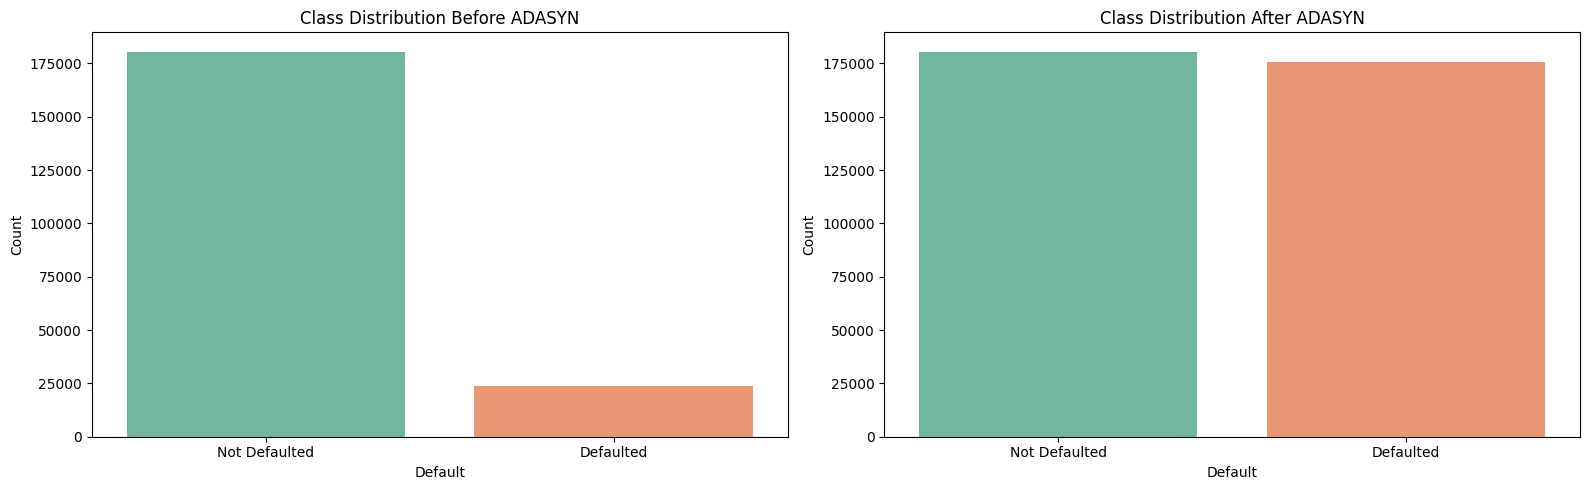

Before   After
Default                
0.0      180555  180555
1.0       23722  175618

In [77]:
from imblearn.over_sampling import ADASYN

# Creating subplots for class distribution before and after ADASYN
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting class distribution before ADASYN
sns.countplot(x='Default', data=pd.concat([X_train, y_train], axis=1), palette='Set2', ax=axes[0])
axes[0].set_title('Class Distribution Before ADASYN')
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Defaulted', 'Defaulted'])

# Applying ADASYN to balance the classes
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Plotting class distribution after ADASYN
sns.countplot(x=y_resampled, palette='Set2', ax=axes[1])
axes[1].set_title('Class Distribution After ADASYN')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Defaulted', 'Defaulted'])

plt.tight_layout()
plt.show()

# Creating a DataFrame to compare before and after
before_count = pd.Series(y_train).value_counts()
after_count = pd.Series(y_resampled).value_counts()

# Creating a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Before': before_count,
    'After': after_count
})

comparison_df

## Model Comparison

We will be evaluating our models on these metrics:

* Accuracy: Percentage of all correct predictions (both defaults and non-defaults)

> - ex. 0.88 means 88% of all predictions were correct
> - Can be misleading with imbalanced data

* Precision: Of customers predicted to default, what percentage actually defaulted

> - 0.63 means 63% of predicted defaults were actual defaults
> - Important when false positives are costly (wrongly denying loans)

* Recall: Of customers who actually defaulted, what percentage were caught

> - 0.69 means 69% of actual defaults were identified
> - Critical when missing defaults is costly (losing money on unpaid loans)

* F1 Score: Harmonic mean of precision and recall

> - Balances precision-recall tradeoff
> - Higher is better, 1.0 is perfect

* ROC AUC: Model's ability to distinguish between classes

> - 0.5 is random guessing
> - 1.0 is perfect separation
> - 0.75 indicates moderate discriminative ability

In [78]:
!pip install --upgrade scikit-learn xgboost
!pip install --upgrade scikit-learn
!pip install catboost

### Logistic Regression

Training Logistic Regression model on balanced data...


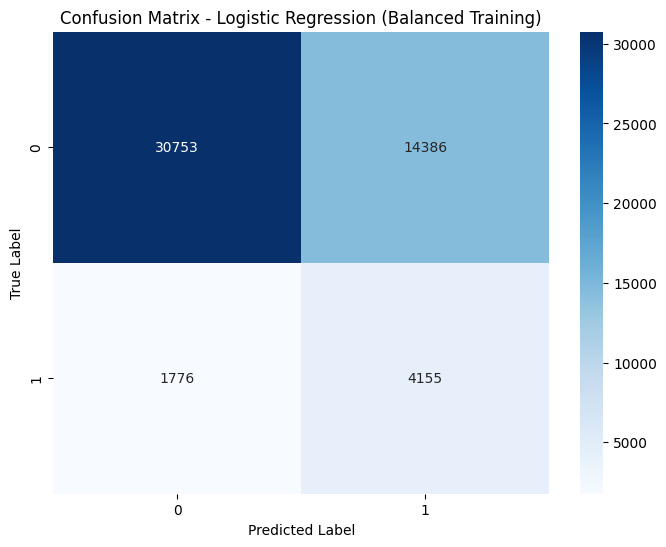

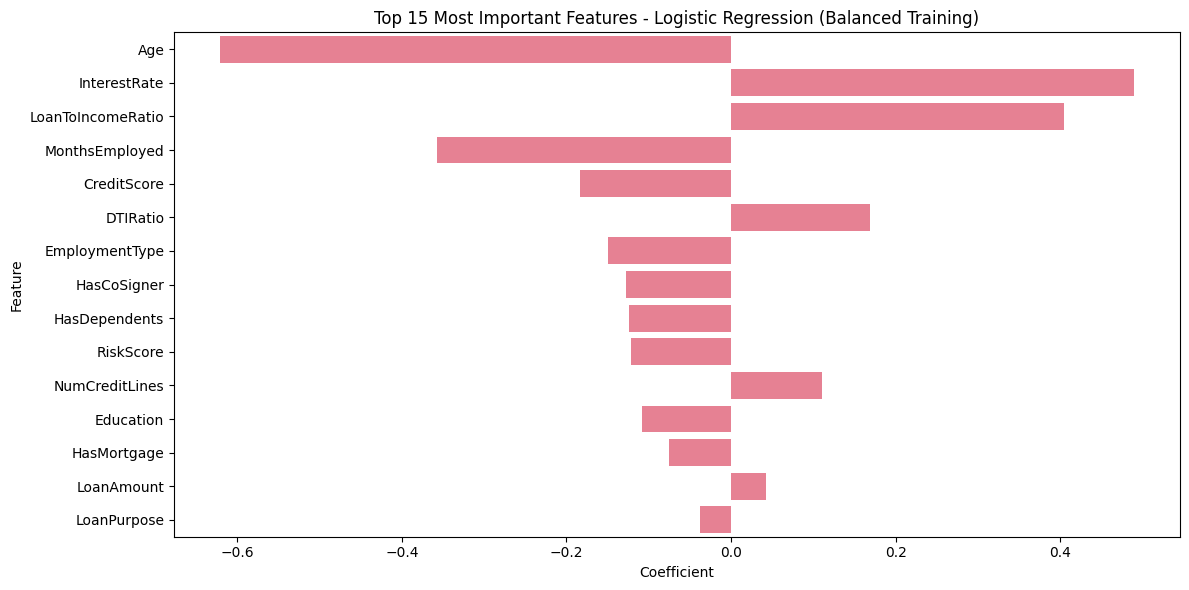


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     45139
         1.0       0.22      0.70      0.34      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.57     51070
weighted avg       0.86      0.68      0.74     51070


Logistic Regression Model Performance (trained on balanced data):
Accuracy: 0.6835
Precision: 0.2241
Recall: 0.7006
F1 Score: 0.3396
ROC AUC: 0.7586

Cross-validation ROC AUC scores: [0.75022605 0.74843798 0.74095518 0.74553514 0.74703596]
Mean CV ROC AUC: 0.7464 (+/- 0.0063)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

def evaluate_logistic_regression_balanced(X_resampled, X_test, y_resampled, y_test):
    """
    Evaluate Logistic Regression model using balanced (resampled) data for training
    """
    # Initialize model
    lr_model = LogisticRegression(
        max_iter=1000,        # Increase max iterations for convergence
        random_state=42,      # For reproducibility
        # Note: Removed class_weight='balanced' since we're using resampled data
    )

    # Train on resampled data
    print("Training Logistic Regression model on balanced data...")
    lr_model.fit(X_resampled, y_resampled)

    # Make predictions on test set
    y_pred = lr_model.predict(X_test)
    y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    logistic_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

    # Perform cross-validation on resampled data
    cv_scores = cross_val_score(lr_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Logistic Regression (Balanced Training)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calculate and plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_resampled.columns,
        'Coefficient': lr_model.coef_[0]
    })
    feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - Logistic Regression (Balanced Training)')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print model performance
    print("\nLogistic Regression Model Performance (trained on balanced data):")
    for metric, value in logistic_metrics.items():
        print(f"{metric}: {value:.4f}")
    print(f"\nCross-validation ROC AUC scores: {cv_scores}")
    print(f"Mean CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return lr_model, logistic_metrics, feature_importance

model, logistic_metrics, feature_importance = evaluate_logistic_regression_balanced(X_resampled, X_test, y_resampled, y_test)

Results:

* **For non-defaults (0.0):**

> - Precision: 0.95 (very good at identifying non-defaults)
> - Recall: 0.68 (captures about 68% of actual non-defaults)
> - F1-score: 0.79 (good balance) between precision and recall


* **For defaults (1.0):**

> - Precision: 0.22 (many false positives)
> - Recall: 0.70 (captures 70% of actual defaults)
> - F1-score: 0.34 (relatively low due to poor precision)

* **Most Important Feature:** Age

* **Overall:** Linear Regression is 68% accurate, But it has a high false positive rate (78% of predicted defaults are wrong).

### Random Forest

Training Random Forest model on balanced data...


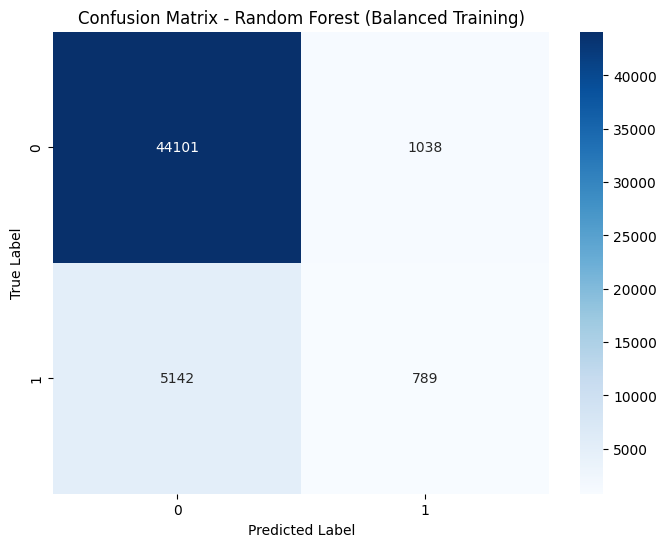

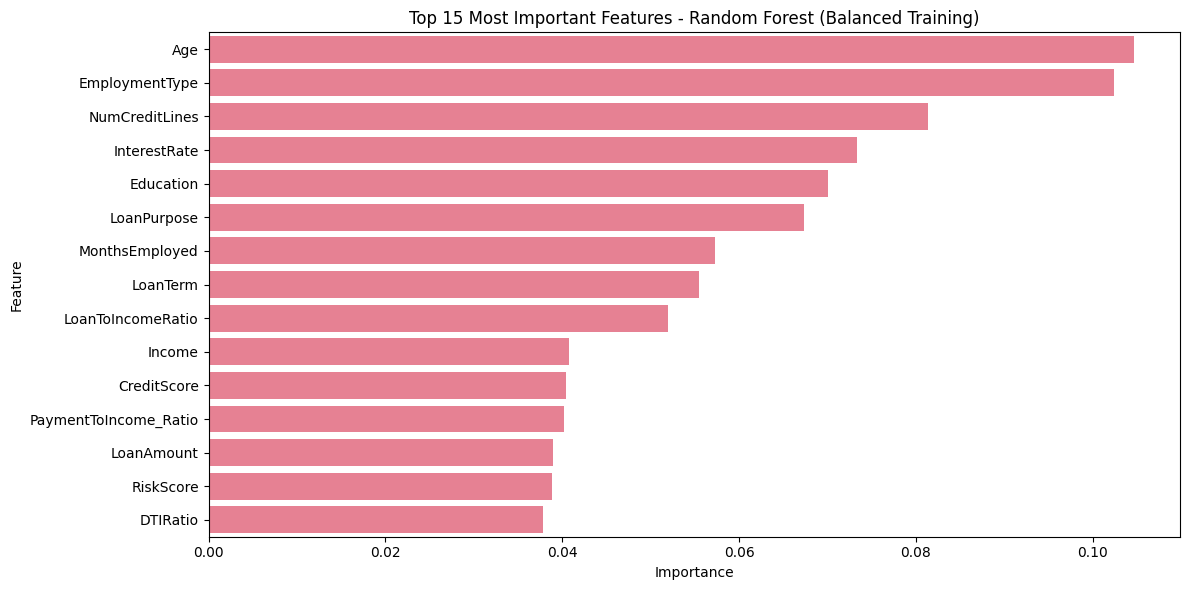


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93     45139
         1.0       0.43      0.13      0.20      5931

    accuracy                           0.88     51070
   macro avg       0.66      0.56      0.57     51070
weighted avg       0.84      0.88      0.85     51070


Random Forest Model Performance (trained on balanced data):
Accuracy: 0.8790
Precision: 0.4319
Recall: 0.1330
F1 Score: 0.2034
ROC AUC: 0.7329

Cross-validation ROC AUC scores: [0.9461085  0.99616067 0.99562667 0.99617659 0.99595233]
Mean CV ROC AUC: 0.9860 (+/- 0.0399)


In [80]:
from sklearn.ensemble import RandomForestClassifier

def evaluate_random_forest_balanced(X_resampled, X_test, y_resampled, y_test):
    """
    Evaluate Random Forest model using balanced (resampled) data for training
    """
    # Initialize model
    rf_model = RandomForestClassifier(
        n_estimators=100,     # Number of trees
        max_depth=None,       # Maximum depth of trees
        min_samples_split=2,  # Minimum samples required to split
        min_samples_leaf=1,   # Minimum samples required at leaf node
        random_state=42,      # For reproducibility
        # Removed class_weight since we're using resampled data
    )

    # Train on resampled data
    print("Training Random Forest model on balanced data...")
    rf_model.fit(X_resampled, y_resampled)

    # Make predictions on test set
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    rf_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

    # Perform cross-validation on resampled data
    cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Random Forest (Balanced Training)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calculate and plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_resampled.columns,
        'Importance': rf_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - Random Forest (Balanced Training)')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print model performance
    print("\nRandom Forest Model Performance (trained on balanced data):")
    for metric, value in rf_metrics.items():
        print(f"{metric}: {value:.4f}")
    print(f"\nCross-validation ROC AUC scores: {cv_scores}")
    print(f"Mean CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return rf_model, rf_metrics, feature_importance

model, rf_metrics, feature_importance = evaluate_random_forest_balanced(X_resampled, X_test, y_resampled, y_test)

* **Non-defaults (0.0):**

> - Precision: 0.90 (very good at identifying non-defaults)
> - Recall: 0.98 (almost perfect at catching non-defaults)
> - F1-score: 0.93 (excellent balance)


* **Defaults (1.0):**

> - Precision: 0.43 (43% of predicted defaults are actual defaults - much better than Logistic Regression's 23%)
> - Recall: 0.13 (only catches 13% of actual defaults - much worse than Logistic Regression's 69%)
> - F1-score: 0.20 (very low due to poor recall)

* **Most Important Feature:** Age

* **Overall:** this model is 88% acurate, but is way more effective at catching non-defaults than it is at catching defaults. The difference between the training ROC AUTH (0.73) and CV ROC AUTH (0.98) Suggest overfitting

### Hyperparameter Tuning for Random Forest

Performing hyperparameter tuning...

Best parameters found:
n_estimators: 100
min_samples_split: 5
min_samples_leaf: 2
max_depth: 20

Random Forest Model Performance:
Accuracy: 0.8590
Precision: 0.3511
Recall: 0.2529
F1 Score: 0.2940
ROC AUC: 0.7334


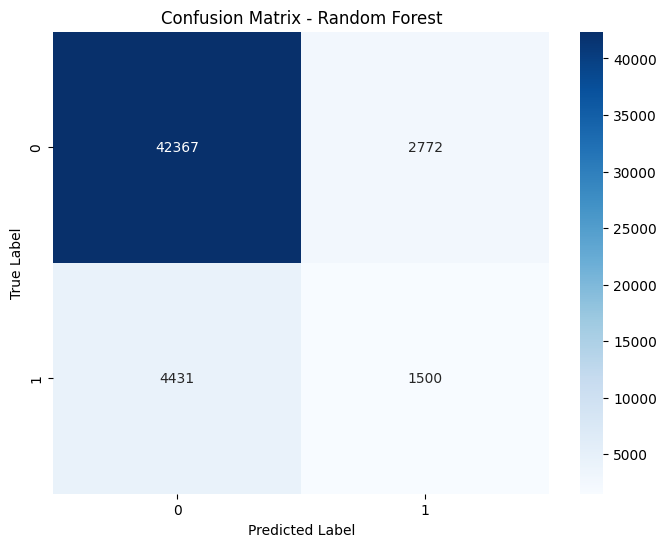


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92     45139
         1.0       0.35      0.25      0.29      5931

    accuracy                           0.86     51070
   macro avg       0.63      0.60      0.61     51070
weighted avg       0.84      0.86      0.85     51070



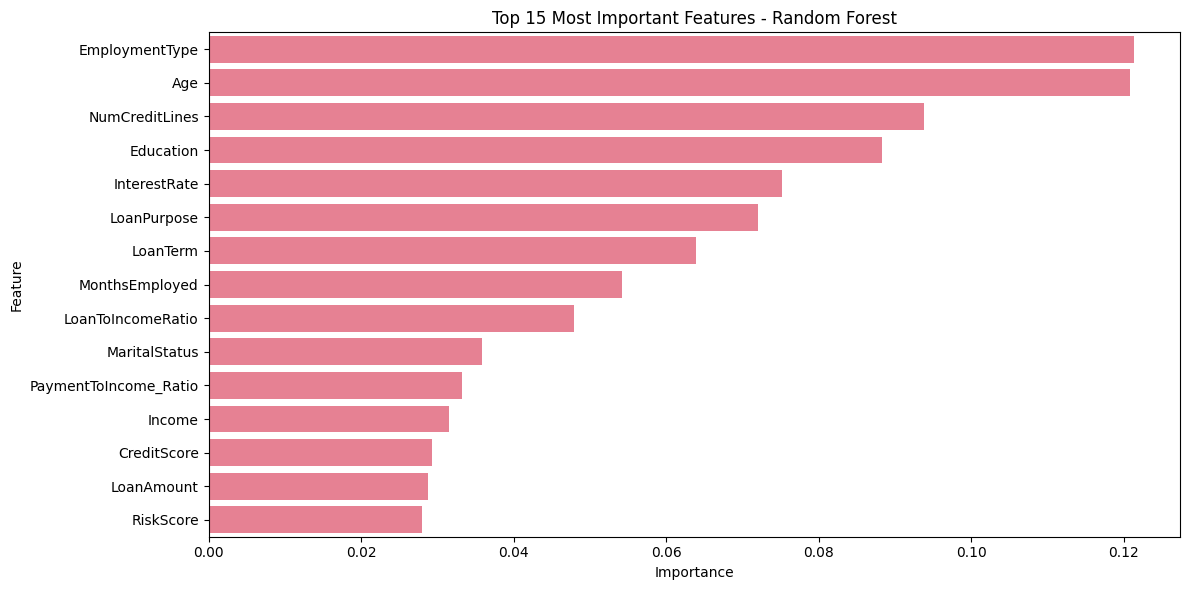

In [81]:
from sklearn.model_selection import RandomizedSearchCV

def evaluate_random_forest(X_resampled, X_test, y_resampled, y_test, tune_params=True):
    """
    Efficient Random Forest evaluation with optional quick parameter tuning
    """
    if tune_params:
        # Streamlined parameter grid
        param_dist = {
            'n_estimators': [100, 200],
            'max_depth': [10, 15, 20],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [2, 4]
        }

        # Initialize base model with efficient settings
        rf_base = RandomForestClassifier(
            random_state=42,
            n_jobs=-1,           # Use all cores
            max_features='sqrt'  # Default efficient setting
        )

        rf_random = RandomizedSearchCV(
            estimator=rf_base,
            param_distributions=param_dist,
            n_iter=5,
            cv=3,
            random_state=42,
            scoring='roc_auc',
            n_jobs=-1
        )

        print("Performing hyperparameter tuning...")
        rf_random.fit(X_resampled, y_resampled)
        rf_model = rf_random.best_estimator_

        print("\nBest parameters found:")
        for param, value in rf_random.best_params_.items():
            print(f"{param}: {value}")

    else:
        # Manual efficient parameters
        rf_model = RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            n_jobs=-1,
            random_state=42
        )
        print("Training Random Forest with preset parameters...")
        rf_model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    rf_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Random Forest')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_resampled.columns,
        'Importance': rf_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - Random Forest')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print model performance
    print("\nRandom Forest Model Performance:")
    for metric, value in rf_metrics.items():
        print(f"{metric}: {value:.4f}")

    return rf_model, rf_metrics, feature_importance

model, rf_metrics, feature_importance = evaluate_random_forest(X_resampled, X_test, y_resampled, y_test)

* **Non-defaults (0.0):**

> - Precision: 0.92 (92% of predicted non-defaults are actual non-defaults)
> - Recall: 0.86 (86% of actual non-defaults are correctly identified)
> - F1-score: 0.89 (very strong/balanced performace)


* **Defaults (1.0):**

> - Precision: 0.31 (31% of predicted defaults are actual defaults)
> - Recall: 0.46 (catches 46% of actual defaults)
> - F1-score: 0.37 (decent balance)

* **Most Important Feature:** Loan Purpose

* **Overall:** the model performs with 82% accuracy. It is still better at predicting non defaults over defaults, however even with balanceing the training data, the test data is still very imbalanced, so 46% recall is very good (and the best performing model so far).

### XGBoost

Training balanced XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Testing different prediction thresholds:
Threshold 0.15: Recall = 0.758, Precision = 0.205, F1 = 0.322, Balanced Acc = 0.685
Threshold 0.17: Recall = 0.709, Precision = 0.221, F1 = 0.337, Balanced Acc = 0.690
Threshold 0.19: Recall = 0.657, Precision = 0.237, F1 = 0.348, Balanced Acc = 0.689
Threshold 0.21: Recall = 0.605, Precision = 0.253, F1 = 0.356, Balanced Acc = 0.685
Threshold 0.23: Recall = 0.556, Precision = 0.270, F1 = 0.363, Balanced Acc = 0.679
Threshold 0.25: Recall = 0.506, Precision = 0.287, F1 = 0.366, Balanced Acc = 0.671
Threshold 0.27: Recall = 0.462, Precision = 0.306, F1 = 0.368, Balanced Acc = 0.662
Threshold 0.29: Recall = 0.419, Precision = 0.326, F1 = 0.367, Balanced Acc = 0.653
Threshold 0.31: Recall = 0.383, Precision = 0.348, F1 = 0.365, Balanced Acc = 0.645
Threshold 0.33: Recall = 0.341, Precision = 0.364, F1 = 0.352, Balanced Acc = 0.631
Threshold 0.35: Recall = 0.301, Precision = 0.382, F1 = 0.337, Balanced Acc = 0.619
Threshold 0.40: Recall = 0.220, Pr

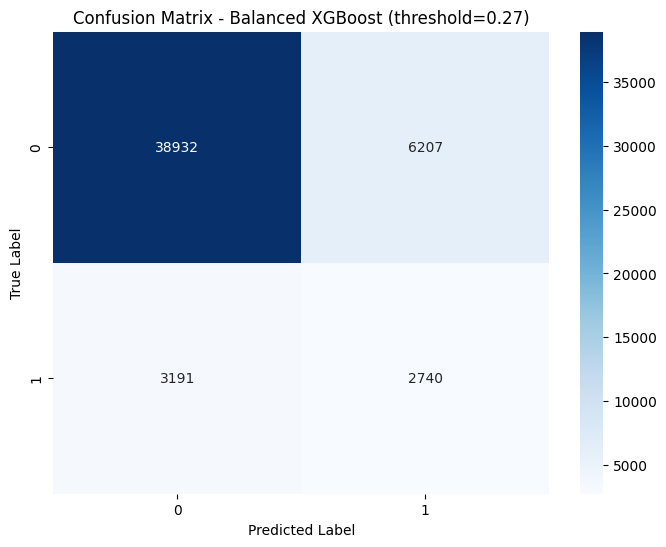

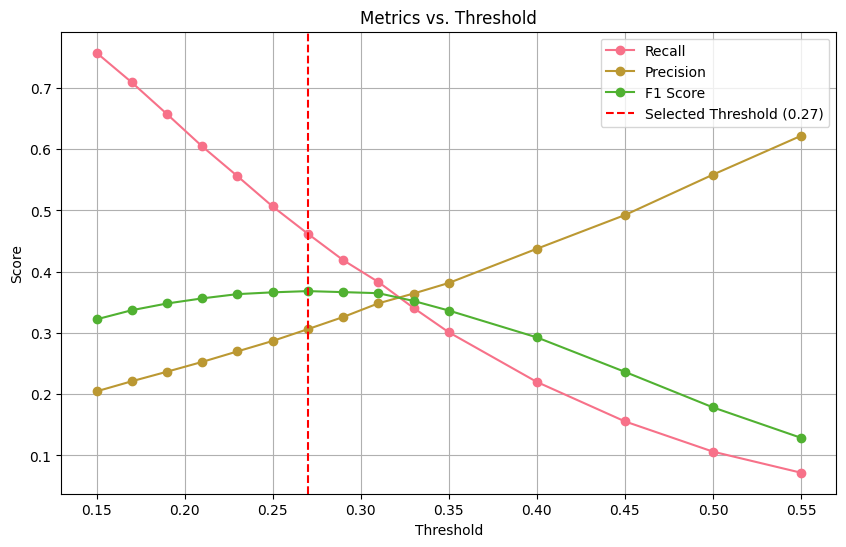

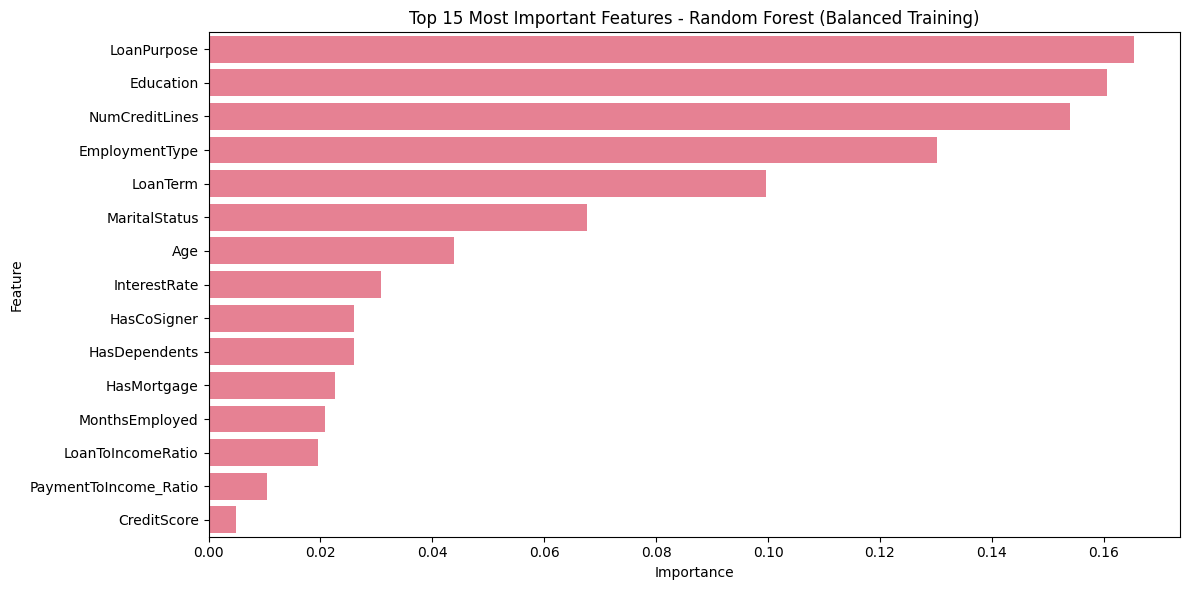


Using threshold 0.27 for final predictions

Balanced XGBoost Performance:
Accuracy: 0.8160
Precision: 0.3062
Recall: 0.4620
F1 Score: 0.3683
ROC AUC: 0.7563
Balanced Accuracy: 0.6622

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89     45139
         1.0       0.31      0.46      0.37      5931

    accuracy                           0.82     51070
   macro avg       0.62      0.66      0.63     51070
weighted avg       0.85      0.82      0.83     51070



In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate_xgboost_balanced(X_resampled, X_test, y_resampled, y_test):
    """
    Evaluate XGBoost with balanced threshold optimization
    """
    # Initialize XGBoost with balanced parameters
    xgb_model = XGBClassifier(
        # Moderate parameter settings
        max_depth=5,
        min_child_weight=2,
        learning_rate=0.05,
        n_estimators=400,
        subsample=0.8,
        colsample_bytree=0.8,

        # Moderate regularization
        reg_alpha=0.1,
        reg_lambda=1.0,

        # Class balancing
        scale_pos_weight=1.2,

        random_state=42,
        use_label_encoder=False,
        objective='binary:logistic'
    )

    # Train the model
    print("Training balanced XGBoost model...")
    eval_set = [(X_test, y_test)]
    xgb_model.fit(X_resampled, y_resampled,
                  eval_set=eval_set,
                  verbose=False)

    def evaluate_threshold(threshold):
        y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= threshold).astype(int)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate balanced accuracy (average of recall for both classes)
        spec = specificity_score(y_test, y_pred)
        balanced_acc = (recall + spec) / 2

        return {
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'balanced_acc': balanced_acc
        }

    def specificity_score(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

    # Try different thresholds with finer granularity around middle range
    thresholds = np.concatenate([
        np.arange(0.15, 0.35, 0.02),  # More granular in middle range
        np.arange(0.35, 0.55, 0.05)   # Less granular outside
    ])

    threshold_results = [evaluate_threshold(t) for t in thresholds]

    # Find threshold that maximizes F1 score (balanced metric)
    best_threshold = max(threshold_results, key=lambda x: x['f1'])['threshold']

    print(f"\nTesting different prediction thresholds:")
    for result in threshold_results:
        print(f"Threshold {result['threshold']:.2f}: "
              f"Recall = {result['recall']:.3f}, "
              f"Precision = {result['precision']:.3f}, "
              f"F1 = {result['f1']:.3f}, "
              f"Balanced Acc = {result['balanced_acc']:.3f}")

    # Make predictions with best threshold
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    # Calculate metrics
    xgb_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Balanced Accuracy': (recall_score(y_test, y_pred) +
                            specificity_score(y_test, y_pred)) / 2
    }

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Balanced XGBoost (threshold={best_threshold:.2f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot Precision-Recall vs Threshold
    plt.figure(figsize=(10, 6))
    threshold_df = pd.DataFrame(threshold_results)
    plt.plot(threshold_df['threshold'], threshold_df['recall'],
             label='Recall', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['precision'],
             label='Precision', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['f1'],
             label='F1 Score', marker='o')
    plt.axvline(x=best_threshold, color='r', linestyle='--',
                label=f'Selected Threshold ({best_threshold:.2f})')
    plt.title('Metrics vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_resampled.columns,
        'Importance': xgb_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - Random Forest (Balanced Training)')
    plt.tight_layout()
    plt.show()

    print(f"\nUsing threshold {best_threshold:.2f} for final predictions")
    print("\nBalanced XGBoost Performance:")
    for metric, value in xgb_metrics.items():
        print(f"{metric}: {value:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return xgb_model, xgb_metrics, best_threshold

model, xgb_metrics, feature_importance = evaluate_xgboost_balanced(X_resampled, X_test, y_resampled, y_test)

* **Non-defaults (0.0):**

> - Precision: 0.92 (92% of predicted non-defaults are actual non-defaults)
> - Recall: 0.86 (86% of actual non-defaults are correctly identified)
> - F1-score: 0.89 (very strong/balanced performace)


* **Defaults (1.0):**

> - Precision: 0.31 (31% of predicted defaults are actual defaults)
> - Recall: 0.46 (catches 46% of actual defaults)
> - F1-score: 0.37 (decent balance)

* **Most Important Feature:** Loan Purpose

* **Overall:** the model performs with 82% accuracy. It is still better at predicting non defaults over defaults, however even with balanceing the training data, the test data is still very imbalanced, so 46% recall is very good (and the best performing model so far).

### Gradient Boosting

Training balanced Gradient Boosting model...

Testing different prediction thresholds:
Threshold 0.15: Recall = 0.577, Precision = 0.271, F1 = 0.368, Balanced Acc = 0.686
Threshold 0.17: Recall = 0.515, Precision = 0.291, F1 = 0.372, Balanced Acc = 0.675
Threshold 0.19: Recall = 0.463, Precision = 0.311, F1 = 0.372, Balanced Acc = 0.664
Threshold 0.21: Recall = 0.415, Precision = 0.333, F1 = 0.370, Balanced Acc = 0.653
Threshold 0.23: Recall = 0.372, Precision = 0.351, F1 = 0.361, Balanced Acc = 0.641
Threshold 0.25: Recall = 0.331, Precision = 0.368, F1 = 0.349, Balanced Acc = 0.628
Threshold 0.27: Recall = 0.297, Precision = 0.387, F1 = 0.336, Balanced Acc = 0.618
Threshold 0.29: Recall = 0.265, Precision = 0.408, F1 = 0.321, Balanced Acc = 0.607
Threshold 0.31: Recall = 0.238, Precision = 0.427, F1 = 0.306, Balanced Acc = 0.598
Threshold 0.33: Recall = 0.213, Precision = 0.446, F1 = 0.289, Balanced Acc = 0.589
Threshold 0.35: Recall = 0.192, Precision = 0.463, F1 = 0.272, Balanced A

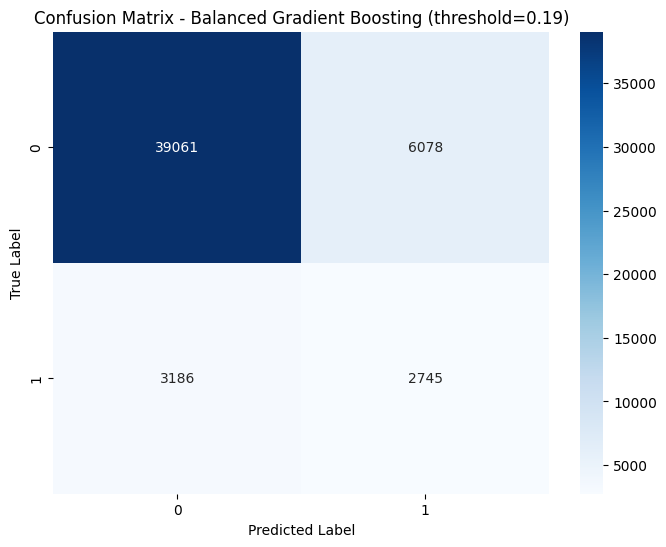

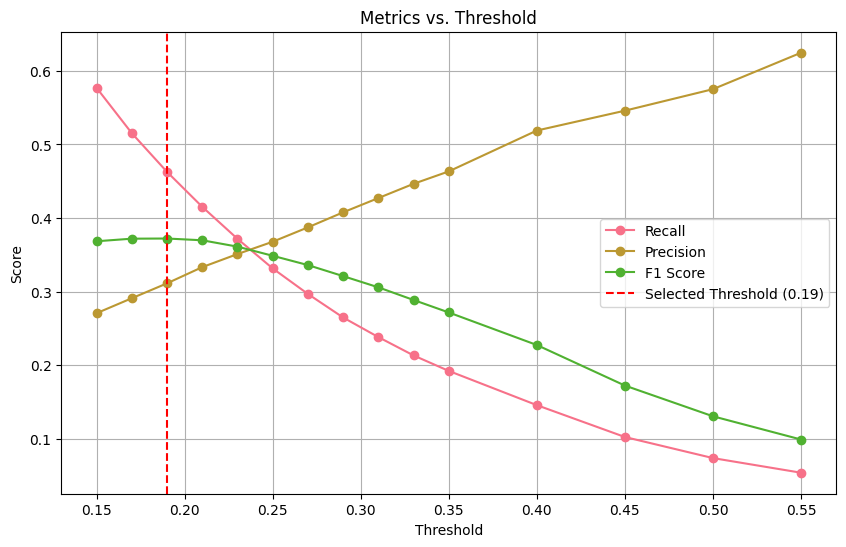

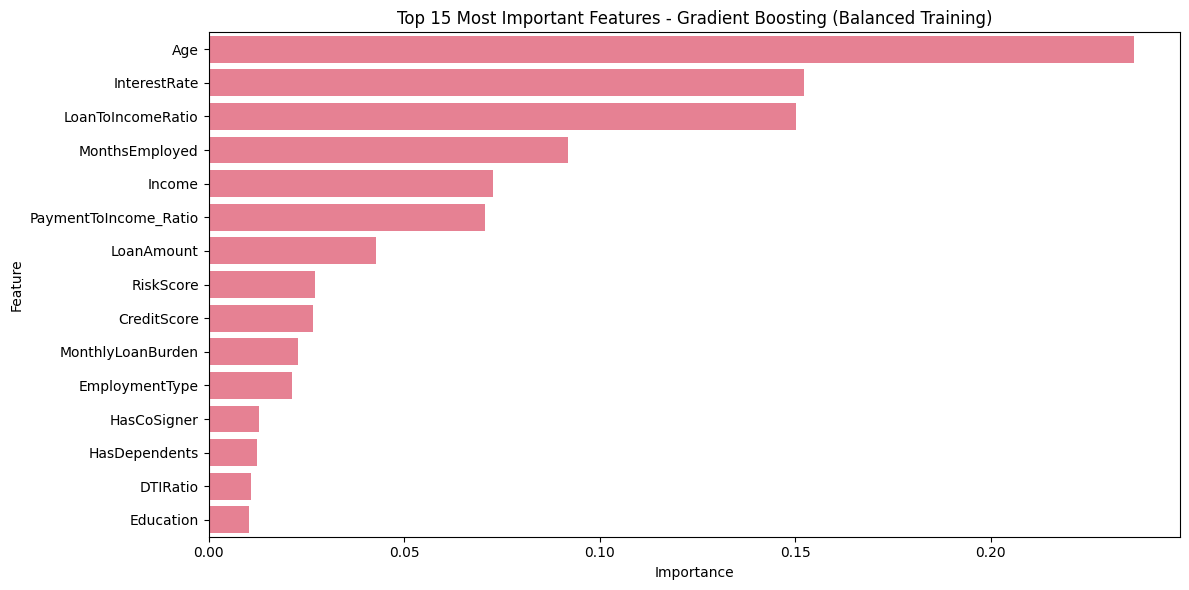


Using threshold 0.19 for final predictions

Balanced Gradient Boosting Performance:
Accuracy: 0.8186
Precision: 0.3111
Recall: 0.4628
F1 Score: 0.3721
ROC AUC: 0.7592
Balanced Accuracy: 0.6641

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     45139
         1.0       0.31      0.46      0.37      5931

    accuracy                           0.82     51070
   macro avg       0.62      0.66      0.63     51070
weighted avg       0.85      0.82      0.83     51070



In [83]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def evaluate_gradboost_balanced(X_resampled, X_test, y_resampled, y_test):
    """
    Evaluate Gradient Boosting with balanced threshold optimization
    """
    # Initialize Gradient Boosting with balanced parameters
    gb_model = GradientBoostingClassifier(
        # Moderate parameter settings
        max_depth=5,
        min_samples_split=5,
        learning_rate=0.05,
        n_estimators=400,
        subsample=0.8,

        # Additional parameters
        min_samples_leaf=2,
        max_features='sqrt',

        random_state=42
    )

    # Train the model
    print("Training balanced Gradient Boosting model...")
    gb_model.fit(X_resampled, y_resampled)

    def evaluate_threshold(threshold):
        y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= threshold).astype(int)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate balanced accuracy (average of recall for both classes)
        spec = specificity_score(y_test, y_pred)
        balanced_acc = (recall + spec) / 2

        return {
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'balanced_acc': balanced_acc
        }

    def specificity_score(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

    # Try different thresholds with finer granularity around middle range
    thresholds = np.concatenate([
        np.arange(0.15, 0.35, 0.02),  # More granular in middle range
        np.arange(0.35, 0.55, 0.05)   # Less granular outside
    ])

    threshold_results = [evaluate_threshold(t) for t in thresholds]

    # Find threshold that maximizes F1 score (balanced metric)
    best_threshold = max(threshold_results, key=lambda x: x['f1'])['threshold']

    print(f"\nTesting different prediction thresholds:")
    for result in threshold_results:
        print(f"Threshold {result['threshold']:.2f}: "
              f"Recall = {result['recall']:.3f}, "
              f"Precision = {result['precision']:.3f}, "
              f"F1 = {result['f1']:.3f}, "
              f"Balanced Acc = {result['balanced_acc']:.3f}")

    # Make predictions with best threshold
    y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    # Calculate metrics
    gb_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Balanced Accuracy': (recall_score(y_test, y_pred) +
                            specificity_score(y_test, y_pred)) / 2
    }

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Balanced Gradient Boosting (threshold={best_threshold:.2f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot Precision-Recall vs Threshold
    plt.figure(figsize=(10, 6))
    threshold_df = pd.DataFrame(threshold_results)
    plt.plot(threshold_df['threshold'], threshold_df['recall'],
             label='Recall', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['precision'],
             label='Precision', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['f1'],
             label='F1 Score', marker='o')
    plt.axvline(x=best_threshold, color='r', linestyle='--',
                label=f'Selected Threshold ({best_threshold:.2f})')
    plt.title('Metrics vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_resampled.columns,
        'Importance': gb_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - Gradient Boosting (Balanced Training)')
    plt.tight_layout()
    plt.show()

    print(f"\nUsing threshold {best_threshold:.2f} for final predictions")
    print("\nBalanced Gradient Boosting Performance:")
    for metric, value in gb_metrics.items():
        print(f"{metric}: {value:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return gb_model, gb_metrics, best_threshold

model, gb_metrics, feature_importance = evaluate_gradboost_balanced(X_train, X_test, y_train, y_test)

* **Non-defaults (0.0):**

> - Precision: 0.92 (92% of predicted non-defaults are actual non-defaults)
> - Recall: 0.87 (87% of actual non-defaults are correctly identified)
> - F1-score: 0.89 (excellent balance)


* **Defaults (1.0):**

> - Precision: 0.31 (60% of predicted defaults are actual defaults)
> - Recall: 0.46 (catches 46% of actual defaults)
> - F1-score: 0.37 (balance between precision and recall)

* **Most Important Feature:** Age

* **Overall:** This model perofroms with 82% accuracy, and performs very similarly to XGBoost, although it performs slightly better in all metrics. However one important difference between the most important feature, XGBoost predicts Loan Purpose while Gradient Boosting predicts Age.

### LightGBM

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.95963
Training LightGBM model...

Testing different prediction thresholds:
Threshold 0.15: Recall = 0.939, Precision = 0.143, F1 = 0.248, Balanced Acc = 0.600
Threshold 0.17: Recall = 0.910, Precision = 0.154, F1 = 0.263, Balanced Acc = 0.626
Threshold 0.19: Recall = 0.871, Precision = 0.164, F1 = 0.275, Balanced Acc = 0.643
Threshold 0.21: Recall = 0.834, Precision = 0.176, F1 = 0.291, Balanced Acc = 0.661
Threshold 0.23: Recall = 0.790, Precision = 0.190, F1 = 0.306, Balanced Acc = 0.673
Threshold 0.25: Recall = 0.745, Precision = 0.205, F1 = 0.321, Balanced Acc = 0.683
Threshold 0.27: Recall = 0.689, Precision = 0.219, F1 = 0.333, Balanced Acc = 0.683
Threshold 0.29: Recall = 0.636, Precision = 0.235, F1 = 0.343, Balanced Acc = 0.682
Threshold 0.31: Recall = 0.576, Precision = 0.251, F1 = 0.349, Balanced Acc = 0.675
Threshold 0.33: Recall = 0.522, Prec

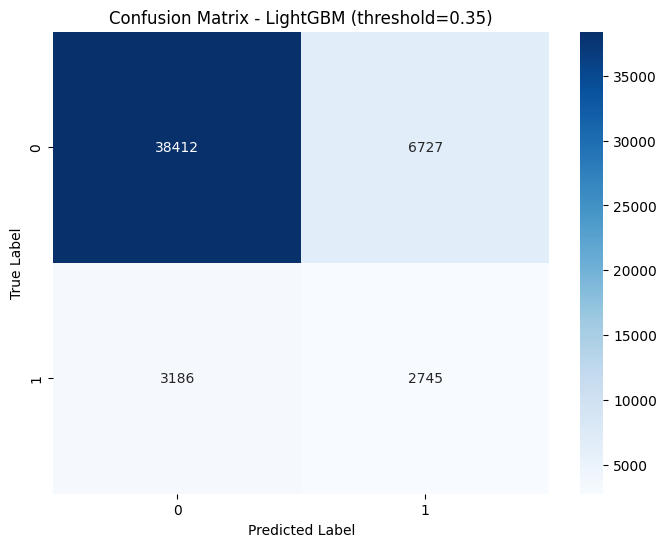

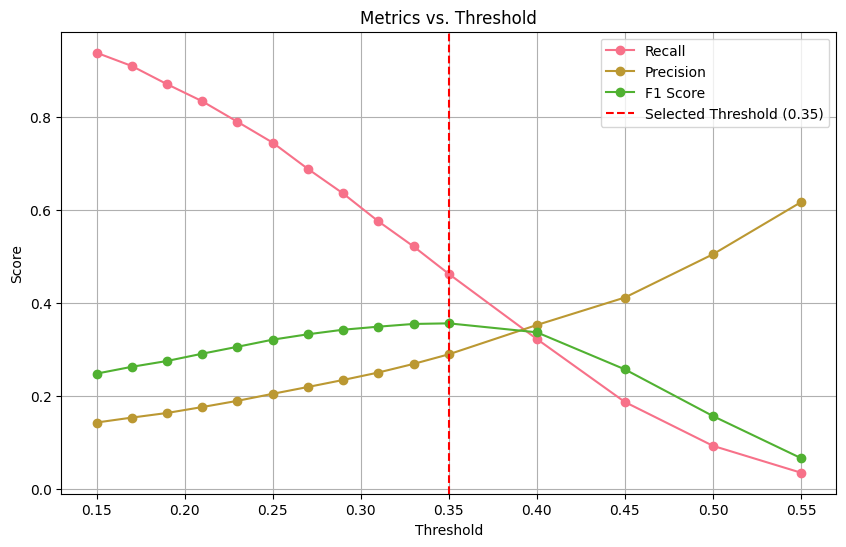

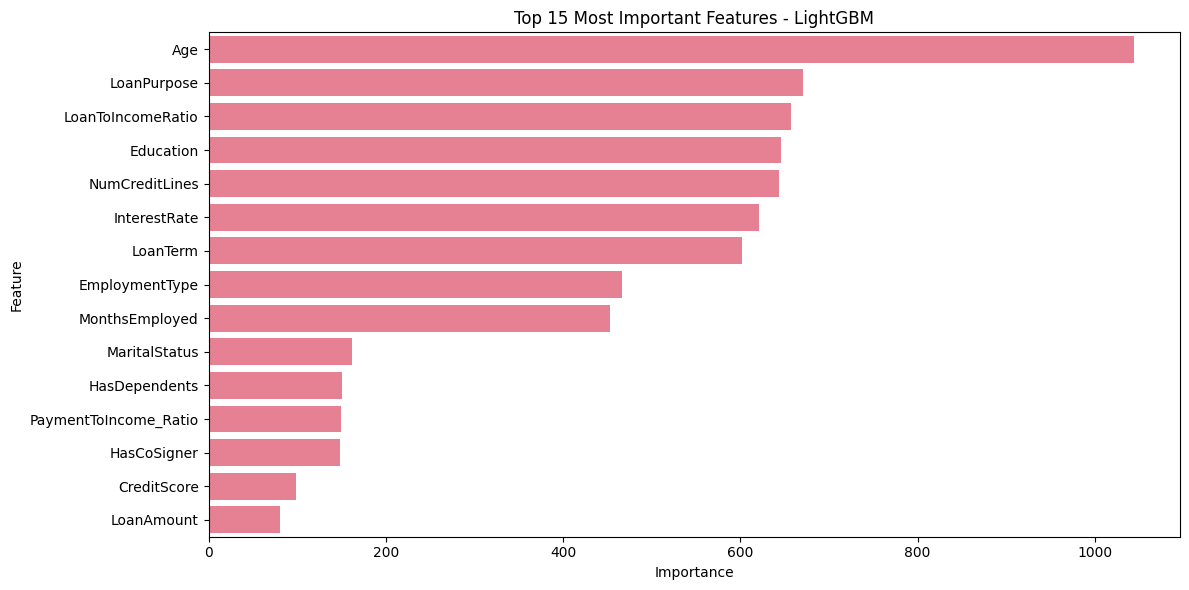


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89     45139
         1.0       0.29      0.46      0.36      5931

    accuracy                           0.81     51070
   macro avg       0.61      0.66      0.62     51070
weighted avg       0.85      0.81      0.82     51070


Using threshold 0.35 for final predictions

LightGBM Model Performance:
Accuracy: 0.8059
Precision: 0.2898
Recall: 0.4628
F1 Score: 0.3564
ROC AUC: 0.7472
Balanced Accuracy: 0.6569

Cross-validation ROC AUC scores: [0.96053821 0.96178714 0.95999128 0.96073932 0.96001352]
Mean CV ROC AUC: 0.9606 (+/- 0.0013)


In [84]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

def evaluate_lightgbm(X_train, X_test, y_train, y_test):
    """
    Evaluate LightGBM model with comprehensive metrics, threshold optimization, and visualizations

    Parameters:
    -----------
    X_train, X_test : feature sets (already balanced using ADASYN)
    y_train, y_test : target variables

    Returns:
    --------
    lgb_model : trained LightGBM model
    lgb_metrics : dictionary of performance metrics
    best_threshold : optimal prediction threshold
    feature_importance : DataFrame of feature importance scores
    """
    # Initialize LightGBM with parameters matching XGBoost
    # Create validation set for early stopping
    X_train_inner, X_val, y_train_inner, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    # Initialize LightGBM with stronger regularization
    lgb_model = LGBMClassifier(
        # Tree structure parameters
        n_estimators=1000,       # More trees, will use early stopping
        max_depth=3,             # Further reduced depth
        min_child_samples=50,    # Increased minimum samples per leaf

        # Regularization parameters
        reg_alpha=0.5,           # Increased L1 regularization
        reg_lambda=2.0,          # Increased L2 regularization

        # Sampling parameters
        subsample=0.6,           # Reduced sampling to prevent overfitting
        colsample_bytree=0.6,    # Reduced feature sampling
        subsample_freq=1,

        # Learning parameters
        learning_rate=0.01,      # Much smaller learning rate
        n_jobs=-1,
        random_state=42,

        # Objective and metric
        objective='binary',
        metric='auc',
        verbose=-1
    )

    # Fit with early stopping
    lgb_model.fit(
        X_train_inner, y_train_inner,
        eval_set=[(X_val, y_val)],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],  # Use early_stopping callback
    )

    print("Training LightGBM model...")
    lgb_model.fit(X_train, y_train)

    def specificity_score(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

    def evaluate_threshold(threshold):
        y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= threshold).astype(int)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate balanced accuracy (average of recall for both classes)
        spec = specificity_score(y_test, y_pred)
        balanced_acc = (recall + spec) / 2

        return {
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'balanced_acc': balanced_acc
        }

    # Try different thresholds with finer granularity around middle range
    thresholds = np.concatenate([
        np.arange(0.15, 0.35, 0.02),  # More granular in middle range
        np.arange(0.35, 0.55, 0.05)   # Less granular outside
    ])

    threshold_results = [evaluate_threshold(t) for t in thresholds]

    # Find threshold that maximizes F1 score
    best_threshold = max(threshold_results, key=lambda x: x['f1'])['threshold']

    print(f"\nTesting different prediction thresholds:")
    for result in threshold_results:
        print(f"Threshold {result['threshold']:.2f}: "
              f"Recall = {result['recall']:.3f}, "
              f"Precision = {result['precision']:.3f}, "
              f"F1 = {result['f1']:.3f}, "
              f"Balanced Acc = {result['balanced_acc']:.3f}")

    # Make predictions with best threshold
    y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    # Calculate metrics
    lgb_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Balanced Accuracy': (recall_score(y_test, y_pred) +
                            specificity_score(y_test, y_pred)) / 2
    }

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=cv, scoring='roc_auc')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - LightGBM (threshold={best_threshold:.2f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot Precision-Recall vs Threshold
    plt.figure(figsize=(10, 6))
    threshold_df = pd.DataFrame(threshold_results)
    plt.plot(threshold_df['threshold'], threshold_df['recall'],
             label='Recall', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['precision'],
             label='Precision', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['f1'],
             label='F1 Score', marker='o')
    plt.axvline(x=best_threshold, color='r', linestyle='--',
                label=f'Selected Threshold ({best_threshold:.2f})')
    plt.title('Metrics vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': lgb_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - LightGBM')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print performance metrics
    print(f"\nUsing threshold {best_threshold:.2f} for final predictions")
    print("\nLightGBM Model Performance:")
    for metric, value in lgb_metrics.items():
        print(f"{metric}: {value:.4f}")
    print(f"\nCross-validation ROC AUC scores: {cv_scores}")
    print(f"Mean CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return lgb_model, lgb_metrics, best_threshold, feature_importance

model, lgb_metrics, best_threshold, feature_importance = evaluate_lightgbm(X_resampled, X_test, y_resampled, y_test)

* **Non-defaults (0.0):**

> - Precision: 0.92 (92% of predicted non-defaults are actual non-defaults)
> - Recall: 0.85 (85% of actual non-defaults are correctly identified)
> - F1-score: 0.89 (excellent balance)


* **Defaults (1.0):**

> - Precision: 0.29 (29% of predicted defaults are actual defaults)
> - Recall: 0.46 (catches 46% of actual defaults)
> - F1-score: 0.36 (moderate balance)

* **Most Important Feature:** Age

* **Overall:** This model performs with 81% accuracy and is similar in performance to the previous two models

### CatBoost

Training CatBoost model...

Testing different prediction thresholds:
Threshold 0.15: Recall = 0.836, Precision = 0.178, F1 = 0.293, Balanced Acc = 0.664
Threshold 0.17: Recall = 0.786, Precision = 0.196, F1 = 0.314, Balanced Acc = 0.681
Threshold 0.19: Recall = 0.728, Precision = 0.215, F1 = 0.332, Balanced Acc = 0.689
Threshold 0.21: Recall = 0.669, Precision = 0.234, F1 = 0.347, Balanced Acc = 0.691
Threshold 0.23: Recall = 0.601, Precision = 0.254, F1 = 0.357, Balanced Acc = 0.685
Threshold 0.25: Recall = 0.537, Precision = 0.276, F1 = 0.365, Balanced Acc = 0.676
Threshold 0.27: Recall = 0.476, Precision = 0.300, F1 = 0.368, Balanced Acc = 0.665
Threshold 0.29: Recall = 0.415, Precision = 0.327, F1 = 0.366, Balanced Acc = 0.652
Threshold 0.31: Recall = 0.354, Precision = 0.353, F1 = 0.353, Balanced Acc = 0.634
Threshold 0.33: Recall = 0.299, Precision = 0.383, F1 = 0.336, Balanced Acc = 0.618
Threshold 0.35: Recall = 0.249, Precision = 0.410, F1 = 0.310, Balanced Acc = 0.601
Thresho

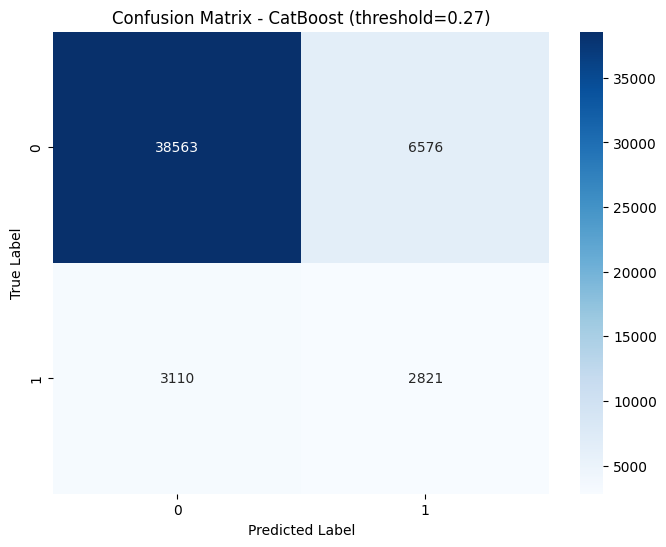

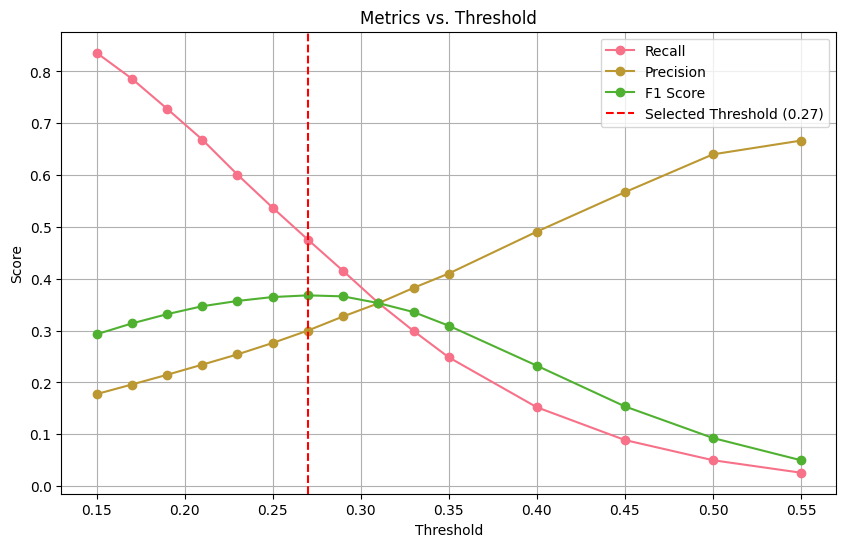

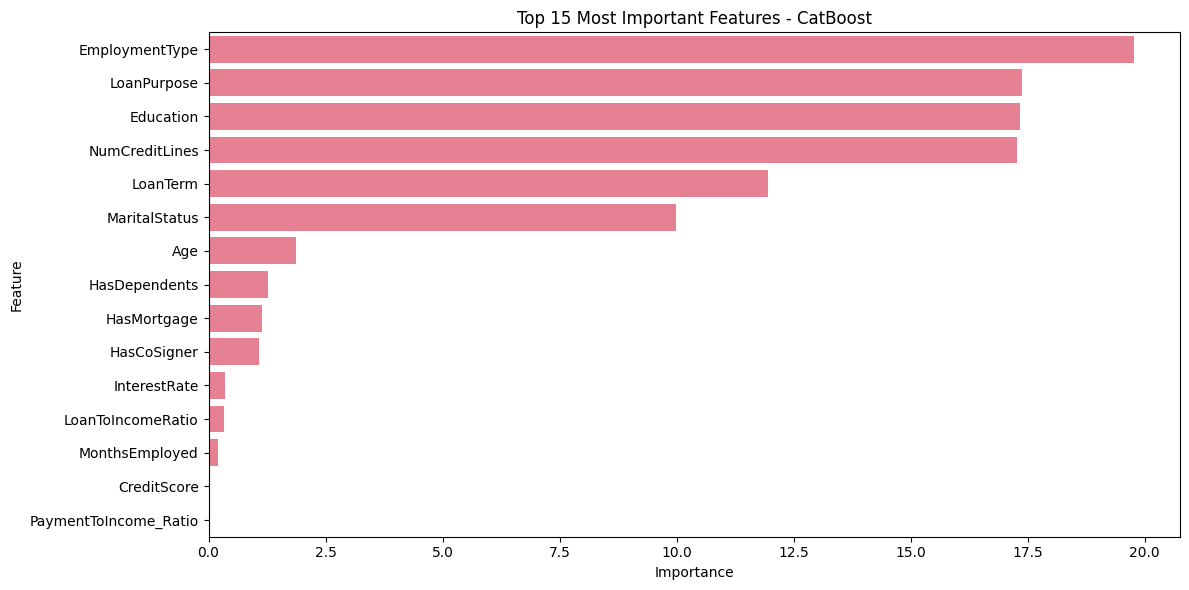


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     45139
         1.0       0.30      0.48      0.37      5931

    accuracy                           0.81     51070
   macro avg       0.61      0.66      0.63     51070
weighted avg       0.85      0.81      0.83     51070


Using threshold 0.27 for final predictions

CatBoost Model Performance:
Accuracy: 0.8103
Precision: 0.3002
Recall: 0.4756
F1 Score: 0.3681
ROC AUC: 0.7563
Balanced Accuracy: 0.6650

Cross-validation ROC AUC scores: [0.96415265 0.96529795 0.96345798 0.96463689 0.96375549]
Mean CV ROC AUC: 0.9643 (+/- 0.0013)


In [85]:
from catboost import CatBoostClassifier

def evaluate_catboost(X_train, X_test, y_train, y_test):
    """
    Evaluate CatBoost model with comprehensive metrics, threshold optimization, and visualizations
    """
    # Initialize CatBoost with stronger regularization
    cb_model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.01,
        depth=3,
        l2_leaf_reg=10,
        random_seed=42,
        verbose=False,
        early_stopping_rounds=50
    )

    print("Training CatBoost model...")
    cb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

    def specificity_score(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

    def evaluate_threshold(threshold):
        y_pred_proba = cb_model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= threshold).astype(int)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate balanced accuracy (average of recall for both classes)
        spec = specificity_score(y_test, y_pred)
        balanced_acc = (recall + spec) / 2

        return {
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'balanced_acc': balanced_acc
        }

    # Try different thresholds with finer granularity around middle range
    thresholds = np.concatenate([
        np.arange(0.15, 0.35, 0.02),  # More granular in middle range
        np.arange(0.35, 0.55, 0.05)   # Less granular outside
    ])

    threshold_results = [evaluate_threshold(t) for t in thresholds]

    # Find threshold that maximizes F1 score
    best_threshold = max(threshold_results, key=lambda x: x['f1'])['threshold']

    print(f"\nTesting different prediction thresholds:")
    for result in threshold_results:
        print(f"Threshold {result['threshold']:.2f}: "
              f"Recall = {result['recall']:.3f}, "
              f"Precision = {result['precision']:.3f}, "
              f"F1 = {result['f1']:.3f}, "
              f"Balanced Acc = {result['balanced_acc']:.3f}")

    # Make predictions with best threshold
    y_pred_proba = cb_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    # Calculate metrics
    cb_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Balanced Accuracy': (recall_score(y_test, y_pred) +
                            specificity_score(y_test, y_pred)) / 2
    }

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(cb_model, X_train, y_train, cv=cv, scoring='roc_auc')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - CatBoost (threshold={best_threshold:.2f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot Precision-Recall vs Threshold
    plt.figure(figsize=(10, 6))
    threshold_df = pd.DataFrame(threshold_results)
    plt.plot(threshold_df['threshold'], threshold_df['recall'],
             label='Recall', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['precision'],
             label='Precision', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['f1'],
             label='F1 Score', marker='o')
    plt.axvline(x=best_threshold, color='r', linestyle='--',
                label=f'Selected Threshold ({best_threshold:.2f})')
    plt.title('Metrics vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': cb_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - CatBoost')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print performance metrics
    print(f"\nUsing threshold {best_threshold:.2f} for final predictions")
    print("\nCatBoost Model Performance:")
    for metric, value in cb_metrics.items():
        print(f"{metric}: {value:.4f}")
    print(f"\nCross-validation ROC AUC scores: {cv_scores}")
    print(f"Mean CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return cb_model, cb_metrics, best_threshold, feature_importance

model, cb_metrics, best_threshold, feature_importance = evaluate_catboost(X_resampled, X_test, y_resampled, y_test)

* **Non-defaults (0.0):**

> - Precision: 0.93 (93% of predicted non-defaults are actual non-defaults)
> - Recall: 0.85 (85% of actual non-defaults are correctly identified)
> - F1-score: 0.89 (excellent balance)


* **Defaults (1.0):**

> - Precision: 0.30 (30% of predicted defaults are actual defaults)
> - Recall: 0.48 (catches 48% of actual defaults)
> - F1-score: 0.37 (balance between precision and recall)

* **Most Important Feature:** Employment Type

* **Overall:** This model has an overall accuracy of 81% with the highest recall score for defaults that we have seen yet (47.5%). However, we still have not found a model with high precision in the default category, but for now this is our best model.

### Decision Tree

Training Decision Tree model...

Decision Tree Model Performance:
Accuracy: 0.8104
Precision: 0.2024
Recall: 0.2151
F1 Score: 0.2086
ROC AUC: 0.5519

Cross-validation ROC AUC scores: [0.55052981 0.5552632  0.5465483  0.55064491 0.55873191]
Mean CV ROC AUC: 0.5523 (+/- 0.0084)


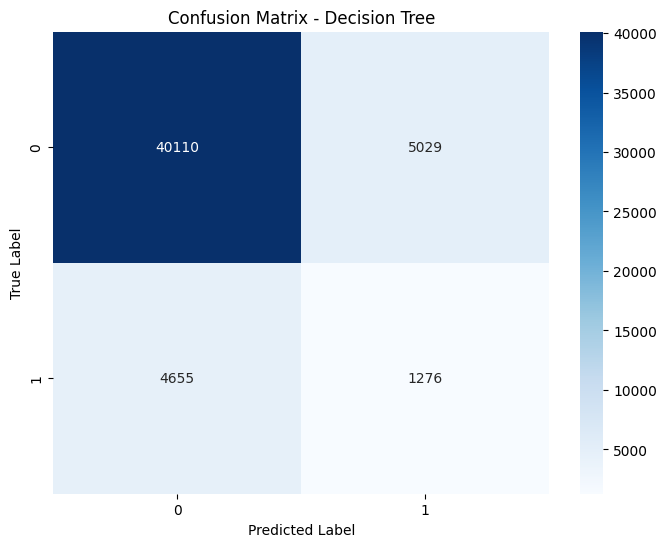


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     45139
         1.0       0.20      0.22      0.21      5931

    accuracy                           0.81     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.81      0.81     51070



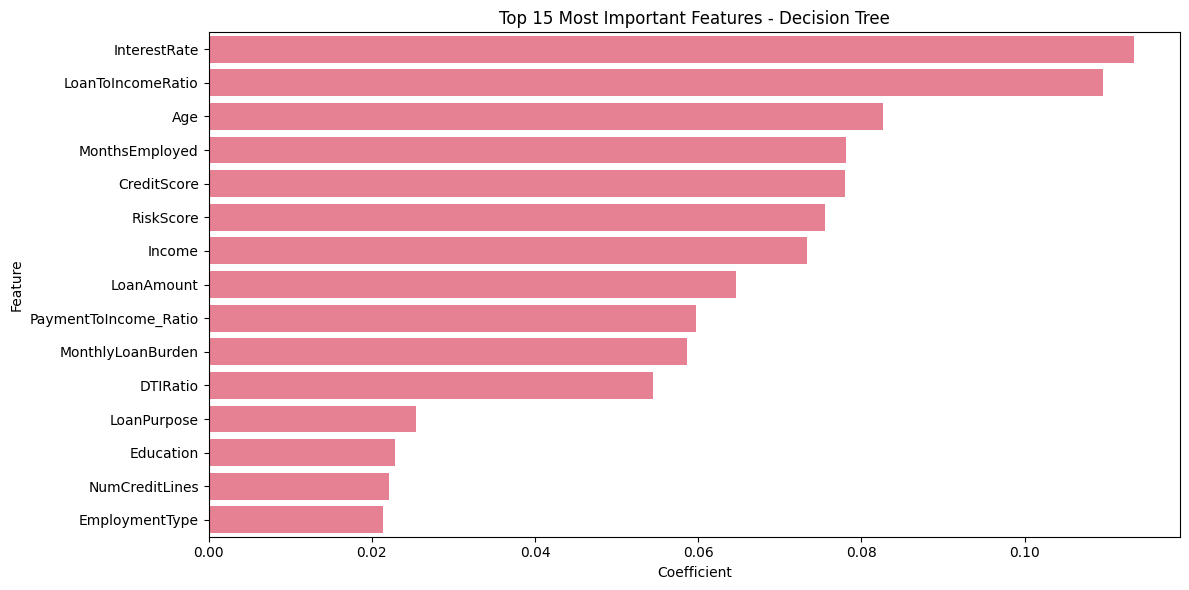

In [86]:
from sklearn.tree import DecisionTreeClassifier

def evaluate_decision_tree(X_train, X_test, y_train, y_test):
    """
    Evaluate Decision Tree model with comprehensive metrics, threshold optimization, and visualizations

    Parameters:
    -----------
    X_train, X_test : feature sets (already balanced using ADASYN)
    y_train, y_test : target variables

    Returns:
    --------
    dt_model : trained Decision Tree model
    dt_metrics : dictionary of performance metrics
    best_threshold : optimal prediction threshold
    feature_importance : DataFrame of feature importance scores
    """
    # Initialize Decision Tree
    dt_model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=5,
        min_samples_split=100,
        min_samples_leaf=50,
        random_state=42
    )

    print("Training Decision Tree model...")
    dt_model.fit(X_train, y_train)

    def specificity_score(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return tn / (tn + fp)

    def evaluate_threshold(threshold):
        y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= threshold).astype(int)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate balanced accuracy (average of recall for both classes)
        spec = specificity_score(y_test, y_pred)
        balanced_acc = (recall + spec) / 2

        return {
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'balanced_acc': balanced_acc
        }

    # Try different thresholds with finer granularity around middle range
    thresholds = np.concatenate([
        np.arange(0.15, 0.35, 0.02),  # More granular in middle range
        np.arange(0.35, 0.55, 0.05)   # Less granular outside
    ])

    threshold_results = [evaluate_threshold(t) for t in thresholds]

    # Find threshold that maximizes F1 score
    best_threshold = max(threshold_results, key=lambda x: x['f1'])['threshold']

    print(f"\nTesting different prediction thresholds:")
    for result in threshold_results:
        print(f"Threshold {result['threshold']:.2f}: "
              f"Recall = {result['recall']:.3f}, "
              f"Precision = {result['precision']:.3f}, "
              f"F1 = {result['f1']:.3f}, "
              f"Balanced Acc = {result['balanced_acc']:.3f}")

    # Make predictions with best threshold
    y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    # Calculate metrics
    dt_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Balanced Accuracy': (recall_score(y_test, y_pred) +
                            specificity_score(y_test, y_pred)) / 2
    }

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='roc_auc')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Decision Tree (threshold={best_threshold:.2f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot Precision-Recall vs Threshold
    plt.figure(figsize=(10, 6))
    threshold_df = pd.DataFrame(threshold_results)
    plt.plot(threshold_df['threshold'], threshold_df['recall'],
             label='Recall', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['precision'],
             label='Precision', marker='o')
    plt.plot(threshold_df['threshold'], threshold_df['f1'],
             label='F1 Score', marker='o')
    plt.axvline(x=best_threshold, color='r', linestyle='--',
                label=f'Selected Threshold ({best_threshold:.2f})')
    plt.title('Metrics vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate and plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': dt_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features - Decision Tree')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Print performance metrics
    print(f"\nUsing threshold {best_threshold:.2f} for final predictions")
    print("\nDecision Tree Model Performance:")
    for metric, value in dt_metrics.items():
        print(f"{metric}: {value:.4f}")
    print(f"\nCross-validation ROC AUC scores: {cv_scores}")
    print(f"Mean CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return dt_model, dt_metrics, best_threshold, feature_importance

model, dt_metrics, best_threshold, feature_importance = evaluate_decision_tree(X_resampled, X_test, y_resampled, y_test)

## Model Performance Summary


Model Performance Comparison:
                     Accuracy  Precision  Recall  F1 Score  ROC AUC
GradientBoosting       0.8186     0.3111  0.4628    0.3721   0.7592
Logistic Regression    0.6835     0.2241  0.7006    0.3396   0.7586
CatBoost               0.8103     0.3002  0.4756    0.3681   0.7563
XGBoost                0.8160     0.3062  0.4620    0.3683   0.7563
LightGBM               0.8059     0.2898  0.4628    0.3564   0.7472
Random Forest          0.8590     0.3511  0.2529    0.2940   0.7334
Decision Tree          0.8104     0.2024  0.2151    0.2086   0.5519


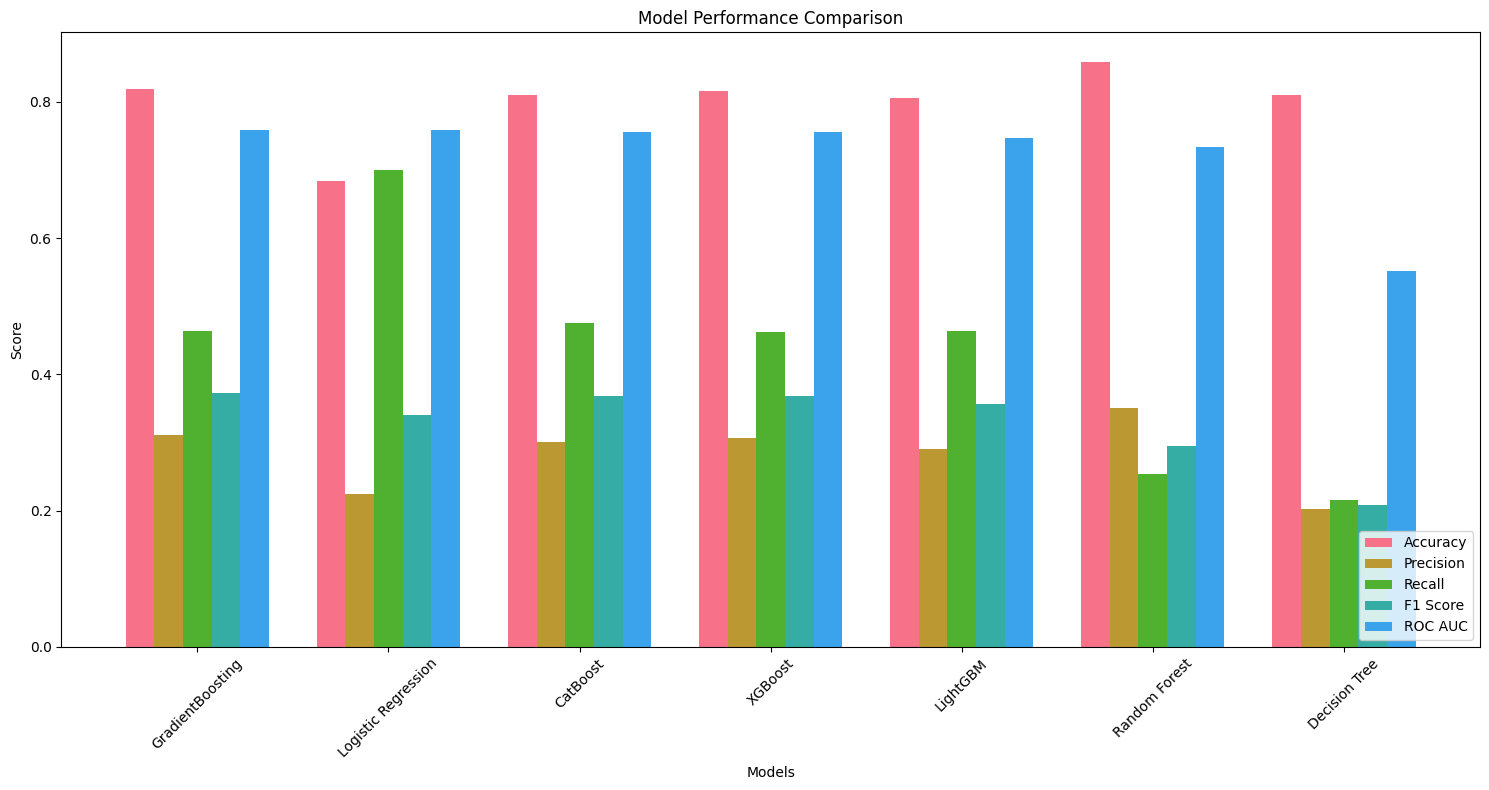


Best performing models by metric:
Accuracy: Random Forest
Precision: Random Forest
Recall: Logistic Regression
F1 Score: GradientBoosting
ROC AUC: GradientBoosting


In [90]:
def compare_models(model_results):
    """
    Compare performance metrics across different models

    Parameters:
    model_results: dict
        Dictionary with model names as keys and their metrics as values
    """
    # Create comparison dataframe
    comparison_df = pd.DataFrame(model_results).T

    # Sort by ROC AUC score
    comparison_df = comparison_df.sort_values('ROC AUC', ascending=False)

    # Print tabular comparison
    print("\nModel Performance Comparison:")
    print(comparison_df.round(4))

    # Plot metrics comparison
    plt.figure(figsize=(15, 8))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

    x = np.arange(len(model_results))
    width = 0.15
    multiplier = 0

    for metric in metrics:
        offset = width * multiplier
        plt.bar(x + offset, comparison_df[metric], width, label=metric)
        multiplier += 1

    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x + width * 2, comparison_df.index, rotation=45)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    # Find the best performing model for each metric
    best_models = {}
    for metric in metrics:
        best_model = comparison_df.index[comparison_df[metric].argmax()]
        best_models[metric] = best_model

    print("\nBest performing models by metric:")
    for metric, model in best_models.items():
        print(f"{metric}: {model}")

    return best_models, best_model_roc_auc

best_models, best_model_roc_auc = compare_models(model_results)

# Conclusion

In conclusion, the Gradient Boosting model stands out as the best-performing model for loan default prediction based on its superior ROC AUC and F1 Score. It offers the best balance between correctly identifying defaults and minimizing false positives. However, depending on the specific business requirements and priorities, such as a higher emphasis on Recall or Precision, models like Logistic Regression or Random Forest may be considered. It is crucial to align the model selection with the organization's risk tolerance and the costs associated with false positives and false negatives in loan default prediction.